In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv('SAML-D.csv')
df

Time        Date  Sender_account  Receiver_account    Amount  \
0        10:35:19  2022-10-07      8724731955        2769355426   1459.15   
1        10:35:20  2022-10-07      1491989064        8401255335   6019.64   
2        10:35:20  2022-10-07       287305149        4404767002  14328.44   
3        10:35:21  2022-10-07      5376652437        9600420220  11895.00   
4        10:35:21  2022-10-07      9614186178        3803336972    115.25   
...           ...         ...             ...               ...       ...   
9504847  10:57:01  2023-08-23      2453933570         519744068   2247.25   
9504848  10:57:06  2023-08-23      9805510177        5416607878    927.18   
9504849  10:57:06  2023-08-23      7282330957        2995527149   1455.14   
9504850  10:57:11  2023-08-23       940337377        4812815165  25995.70   
9504851  10:57:12  2023-08-23       105185176        6824994831   9586.08   

        Payment_currency Received_currency Sender_bank_location  \
0              UK pounds         UK pounds                   UK   
1              UK pounds            Dirham                   UK   
2              UK pounds         UK pounds                   UK   
3              UK pounds         UK pounds                   UK   
4              UK pounds         UK pounds                   UK   
...                  ...               ...                  ...   
9504847        UK pounds         UK pounds                   UK   
9504848        UK pounds         UK pounds                   UK   
9504849        UK pounds         UK pounds                   UK   
9504850        UK pounds         UK pounds                   UK   
9504851        UK pounds         UK pounds                   UK   

        Receiver_bank_location  Payment_type  Is_laundering  \
0                           UK  Cash Deposit              0   
1                          UAE  Cross-border              0   
2                           UK        Cheque              0   
3                           UK           ACH              0   
4                           UK  Cash Deposit              0   
...                        ...           ...            ...   
9504847                     UK           ACH              0   
9504848                     UK    Debit card              0   
9504849                     UK           ACH              0   
9504850                     UK           ACH              0   
9504851                     UK           ACH              0   

              Laundering_type  
0        Normal_Cash_Deposits  
1              Normal_Fan_Out  
2        Normal_Small_Fan_Out  
3               Normal_Fan_In  
4        Normal_Cash_Deposits  
...                       ...  
9504847  Normal_Small_Fan_Out  
9504848  Normal_Small_Fan_Out  
9504849  Normal_Small_Fan_Out  
9504850         Normal_Fan_In  
9504851        Normal_Fan_Out  

[9504852 rows x 12 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [10]:
# Import pandas
import pandas as pd

# Set pandas display options to show full numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)  # Format with 2 decimal places
# Alternatively, you can use this to show all decimal places
# pd.set_option('display.float_format', lambda x: f'{x}')

# Now when you run your describe command, numbers won't use scientific notation
result = df[df["Is_laundering"] == 0].describe().drop(columns=['Sender_account', 'Receiver_account'])

result

# If you want to reset to default display settings later
# pd.reset_option('display.float_format')

Amount  Is_laundering
count 9494979.00     9494979.00
mean     8729.88           0.00
std     21750.03           0.00
min         3.73           0.00
25%      2142.93           0.00
50%      6114.63           0.00
75%     10458.95           0.00
max    999962.19           0.00

In [11]:
# Import pandas
import pandas as pd

# Set pandas display options to show full numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)  # Format with 2 decimal places
# Alternatively, you can use this to show all decimal places
# pd.set_option('display.float_format', lambda x: f'{x}')

# Now when you run your describe command, numbers won't use scientific notation
result = df[df["Is_laundering"] == 1].describe().drop(columns=['Sender_account', 'Receiver_account'])

result

# If you want to reset to default display settings later
# pd.reset_option('display.float_format')

Amount  Is_laundering
count     9873.00        9873.00
mean     40587.67           1.00
std     419181.13           0.00
min         15.82           1.00
25%       2723.79           1.00
50%       5322.79           1.00
75%       9789.67           1.00
max   12618498.40           1.00

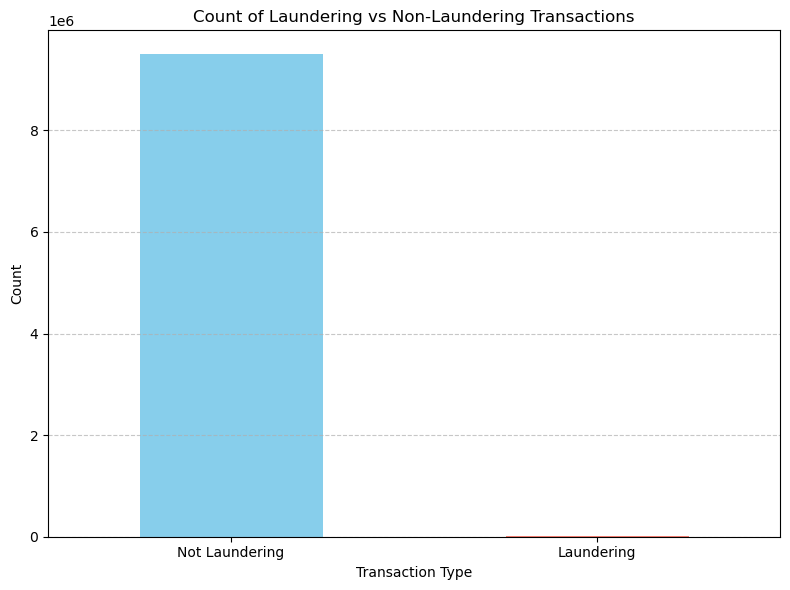

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of each value in is_laundering column
laundering_counts = df['Is_laundering'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
laundering_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Laundering vs Non-Laundering Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Laundering', 'Laundering'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

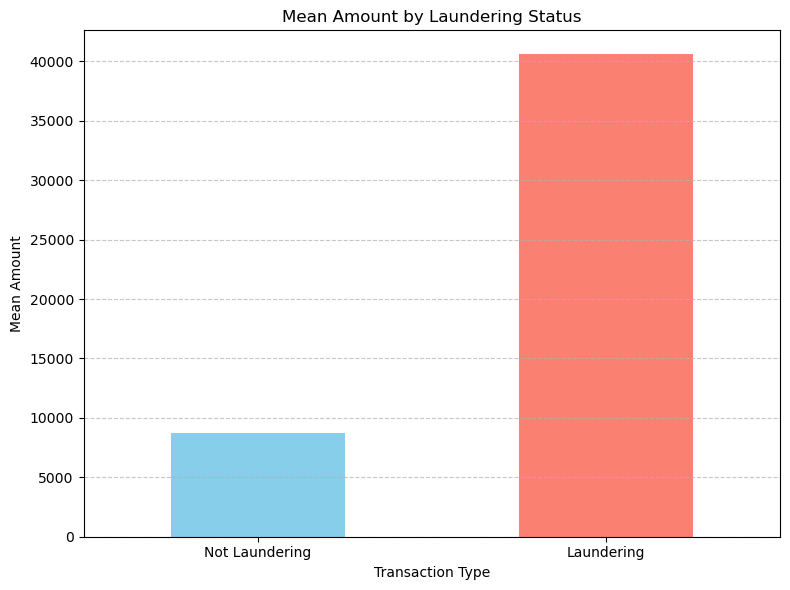

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the mean Amount for each is_laundering value
mean_amounts = df.groupby('Is_laundering')['Amount'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
mean_amounts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Mean Amount by Laundering Status')
plt.xlabel('Transaction Type')
plt.ylabel('Mean Amount')
plt.xticks(ticks=[0, 1], labels=['Not Laundering', 'Laundering'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

In [5]:
laundering_counts

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64

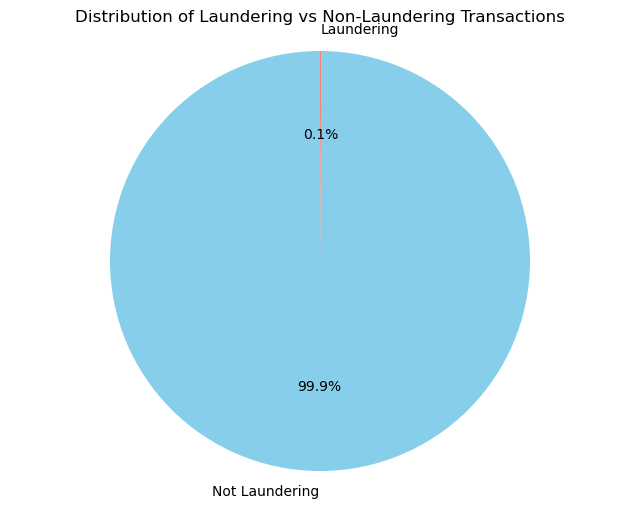

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of each value in is_laundering column
laundering_counts = df['Is_laundering'].value_counts()

# Define labels and ensure correct mapping
labels = ['Not Laundering', 'Laundering']
laundering_counts = laundering_counts.reindex([0, 1])  # Ensure 0 and 1 align with labels

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(laundering_counts, labels=labels, colors=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Laundering vs Non-Laundering Transactions')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular

# Show plot
plt.show()

In [299]:
df

Time       Date  Sender_account  Receiver_account   Amount  \
0        10:35:19 2022-10-07      8724731955        2769355426  1459.15   
1        10:35:20 2022-10-07      1491989064        8401255335  6019.64   
2        10:35:20 2022-10-07       287305149        4404767002 14328.44   
3        10:35:21 2022-10-07      5376652437        9600420220 11895.00   
4        10:35:21 2022-10-07      9614186178        3803336972   115.25   
...           ...        ...             ...               ...      ...   
9504847  10:57:01 2023-08-23      2453933570         519744068  2247.25   
9504848  10:57:06 2023-08-23      9805510177        5416607878   927.18   
9504849  10:57:06 2023-08-23      7282330957        2995527149  1455.14   
9504850  10:57:11 2023-08-23       940337377        4812815165 25995.70   
9504851  10:57:12 2023-08-23       105185176        6824994831  9586.08   

        Payment_currency Received_currency Sender_bank_location  \
0              UK pounds         UK pounds                   UK   
1              UK pounds            Dirham                   UK   
2              UK pounds         UK pounds                   UK   
3              UK pounds         UK pounds                   UK   
4              UK pounds         UK pounds                   UK   
...                  ...               ...                  ...   
9504847        UK pounds         UK pounds                   UK   
9504848        UK pounds         UK pounds                   UK   
9504849        UK pounds         UK pounds                   UK   
9504850        UK pounds         UK pounds                   UK   
9504851        UK pounds         UK pounds                   UK   

        Receiver_bank_location  Payment_type Is_laundering  \
0                           UK  Cash Deposit             0   
1                          UAE  Cross-border             0   
2                           UK        Cheque             0   
3                           UK           ACH             0   
4                           UK  Cash Deposit             0   
...                        ...           ...           ...   
9504847                     UK           ACH             0   
9504848                     UK    Debit card             0   
9504849                     UK           ACH             0   
9504850                     UK           ACH             0   
9504851                     UK           ACH             0   

              Laundering_type           currency_pair country_pair  \
0        Normal_Cash_Deposits  UK pounds to UK pounds     UK to UK   
1              Normal_Fan_Out     UK pounds to Dirham    UK to UAE   
2        Normal_Small_Fan_Out  UK pounds to UK pounds     UK to UK   
3               Normal_Fan_In  UK pounds to UK pounds     UK to UK   
4        Normal_Cash_Deposits  UK pounds to UK pounds     UK to UK   
...                       ...                     ...          ...   
9504847  Normal_Small_Fan_Out  UK pounds to UK pounds     UK to UK   
9504848  Normal_Small_Fan_Out  UK pounds to UK pounds     UK to UK   
9504849  Normal_Small_Fan_Out  UK pounds to UK pounds     UK to UK   
9504850         Normal_Fan_In  UK pounds to UK pounds     UK to UK   
9504851        Normal_Fan_Out  UK pounds to UK pounds     UK to UK   

        Sender_bank_location_group Receiver_bank_location_group  Year  Month  \
0                               UK                           UK  2022     10   
1                               UK                          UAE  2022     10   
2                               UK                           UK  2022     10   
3                               UK                           UK  2022     10   
4                               UK                           UK  2022     10   
...                            ...                          ...   ...    ...   
9504847                         UK                           UK  2023      8   
9504848                         UK                           UK  2023      8   
9

<Axes: title={'center': 'Top 10 Sender Accounts by Number of Transactions'}, xlabel='Number of Transactions', ylabel='Sender Account'>

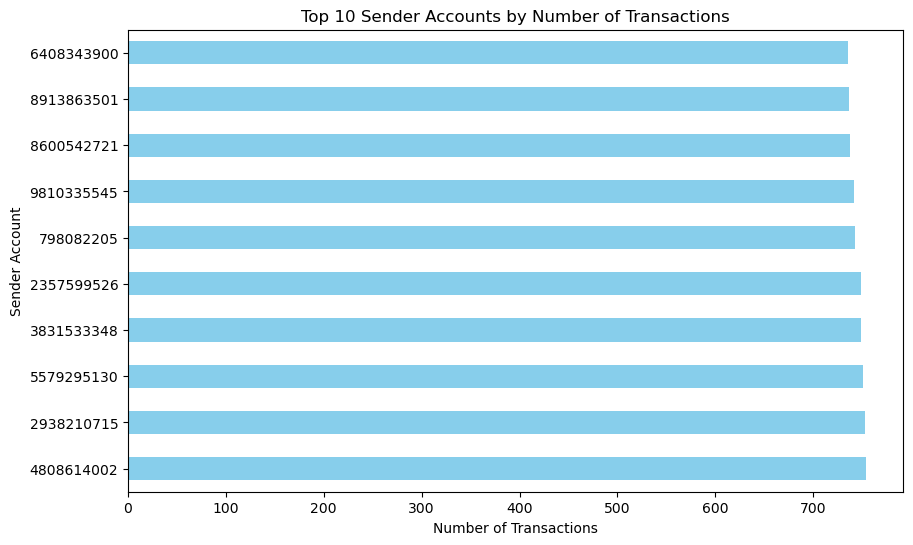

In [303]:
df["Sender_account"].value_counts().head(10).plot(kind='barh', figsize=(10, 6), color='skyblue',xlabel='Number of Transactions',ylabel='Sender Account',title='Top 10 Sender Accounts by Number of Transactions')

<Axes: title={'center': 'Top 10 Receiver Accounts by Number of Transactions'}, xlabel='Number of Transactions', ylabel='Receiver Account'>

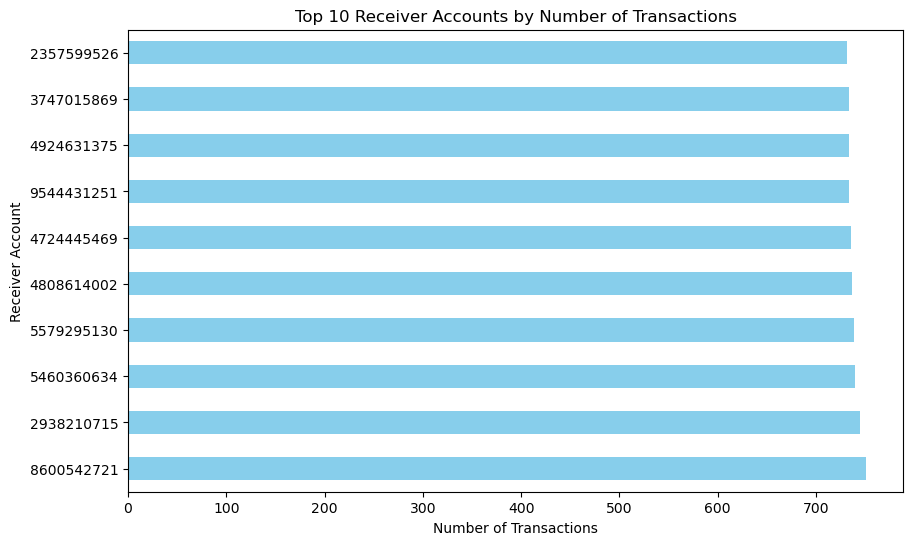

In [304]:
df["Receiver_account"].value_counts().head(10).plot(kind='barh', figsize=(10, 6), color='skyblue',xlabel='Number of Transactions',ylabel='Receiver Account',title='Top 10 Receiver Accounts by Number of Transactions')

In [19]:
import pandas as pd

# Identify categorical columns (object or category dtype)
categorical_columns = df.drop(["Time","Date"],axis = 1).select_dtypes(include=['object', 'category']).columns

# Loop through each categorical column and print value counts
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    print("-" * 50)


Value counts for Payment_currency:
Payment_currency
UK pounds          9099293
Euro                117164
Turkish lira         27996
Swiss franc          27492
Dirham               27263
Pakistani rupee      27196
Naira                27143
US dollar            26061
Yen                  25562
Moroccan dirham      25395
Mexican Peso         24852
Albanian lek         24778
Indian rupee         24657
Name: count, dtype: int64
--------------------------------------------------

Value counts for Received_currency:
Received_currency
UK pounds          8783655
Euro                231911
Pakistani rupee      45993
Yen                  45814
Moroccan dirham      45748
Albanian lek         45736
Mexican Peso         45255
Naira                45046
Indian rupee         43757
US dollar            43664
Swiss franc          42931
Dirham               42797
Turkish lira         42545
Name: count, dtype: int64
--------------------------------------------------

Value counts for Sender_bank_locati

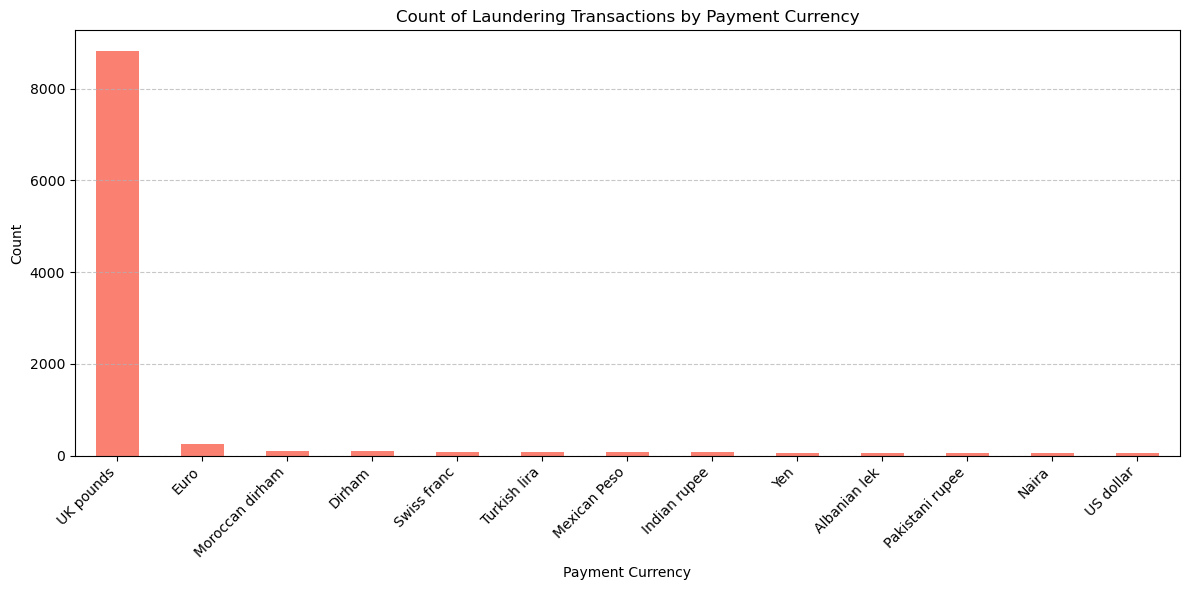

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter for is_laundering == 1 and count occurrences of each Payment_currency
laundering_counts = df[df['Is_laundering'] == 1]['Payment_currency'].value_counts()

# Create bar plot
plt.figure(figsize=(12, 6))
laundering_counts.plot(kind='bar', color='salmon')
plt.title('Count of Laundering Transactions by Payment Currency')
plt.xlabel('Payment Currency')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('laundering_by_currency.png')

# Show the plot
plt.show()

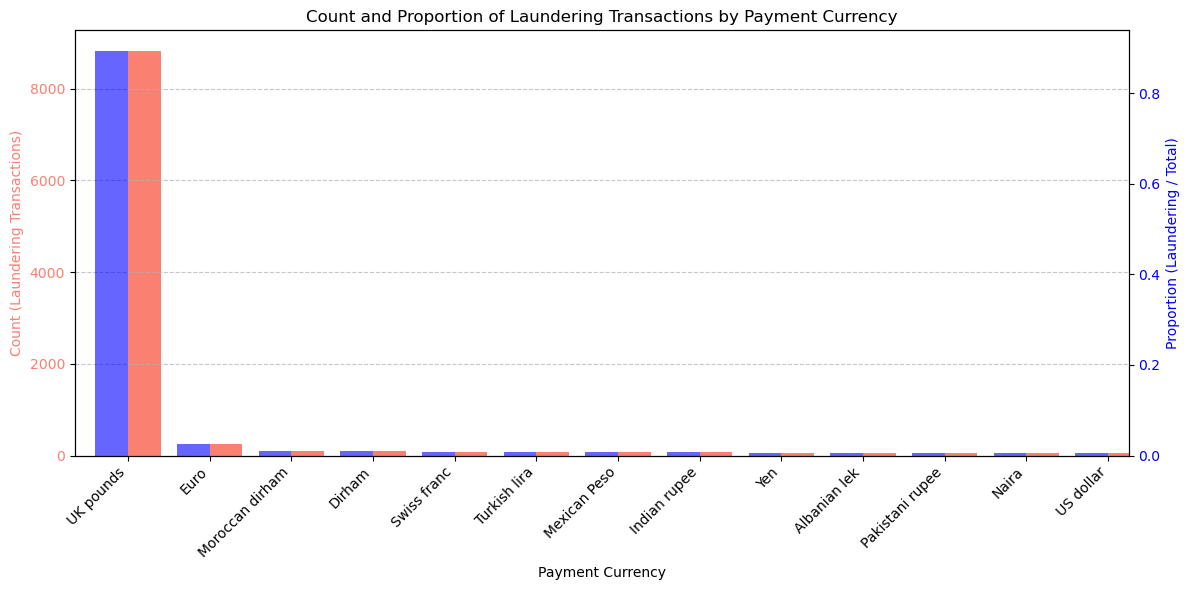

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate counts for is_laundering == 1 by Payment_currency
laundering_counts = df[df['Is_laundering'] == 1]['Payment_currency'].value_counts()

# Calculate total counts for each Payment_currency (including is_laundering 0 and 1)
total_counts = df['Payment_currency'].value_counts()

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts / len(df[df["Is_laundering"] == 1])
proportions = proportions.fillna(0)  # Replace NaN with 0 for currencies with no laundering

# Create figure and axis objects with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot counts on primary y-axis (left)
laundering_counts.plot(kind='bar', color='salmon', ax=ax1, width=0.4, position=0)
ax1.set_xlabel('Payment Currency')
ax1.set_ylabel('Count (Laundering Transactions)', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for proportions
ax2 = ax1.twinx()
proportions.plot(kind='bar', color='blue', ax=ax2, width=0.4, position=1, alpha=0.6)
ax2.set_ylabel('Proportion (Laundering / Total)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set title and adjust x-axis
plt.title('Count and Proportion of Laundering Transactions by Payment Currency')
ax1.set_xticklabels(laundering_counts.index, rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

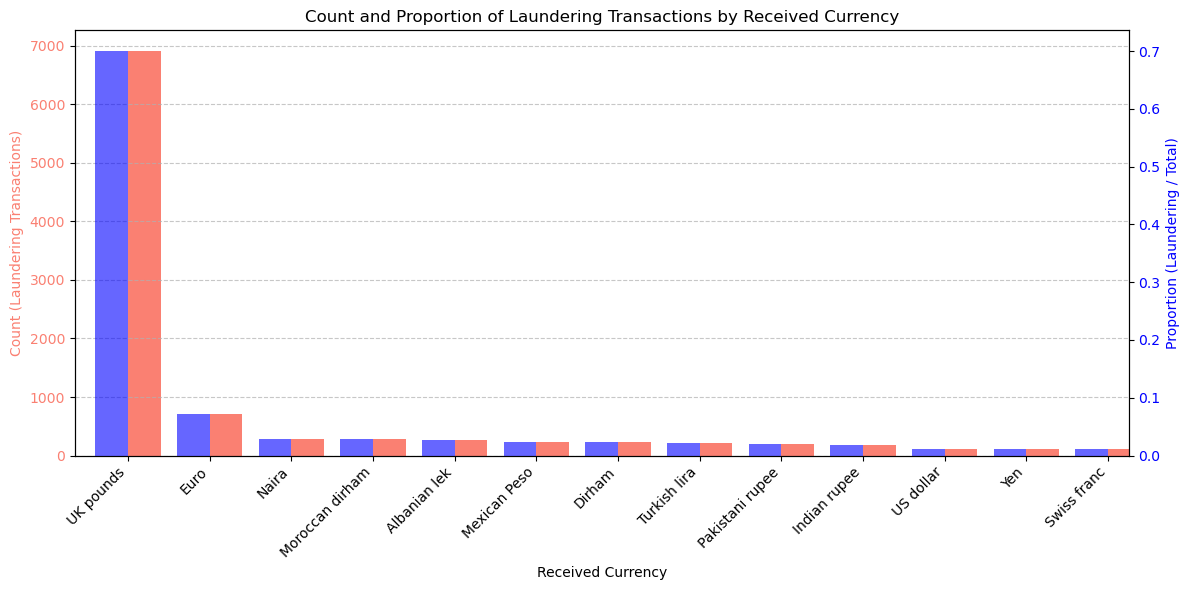

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate counts for is_laundering == 1 by Payment_currency
laundering_counts = df[df['Is_laundering'] == 1]['Received_currency'].value_counts()

# Calculate total counts for each Payment_currency (including is_laundering 0 and 1)
total_counts = df['Received_currency'].value_counts()

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts / len(df[df["Is_laundering"] == 1])
proportions = proportions.fillna(0)  # Replace NaN with 0 for currencies with no laundering

# Create figure and axis objects with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot counts on primary y-axis (left)
laundering_counts.plot(kind='bar', color='salmon', ax=ax1, width=0.4, position=0)
ax1.set_xlabel('Received Currency')
ax1.set_ylabel('Count (Laundering Transactions)', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for proportions
ax2 = ax1.twinx()
proportions.plot(kind='bar', color='blue', ax=ax2, width=0.4, position=1, alpha=0.6)
ax2.set_ylabel('Proportion (Laundering / Total)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set title and adjust x-axis
plt.title('Count and Proportion of Laundering Transactions by Received Currency')
ax1.set_xticklabels(laundering_counts.index, rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

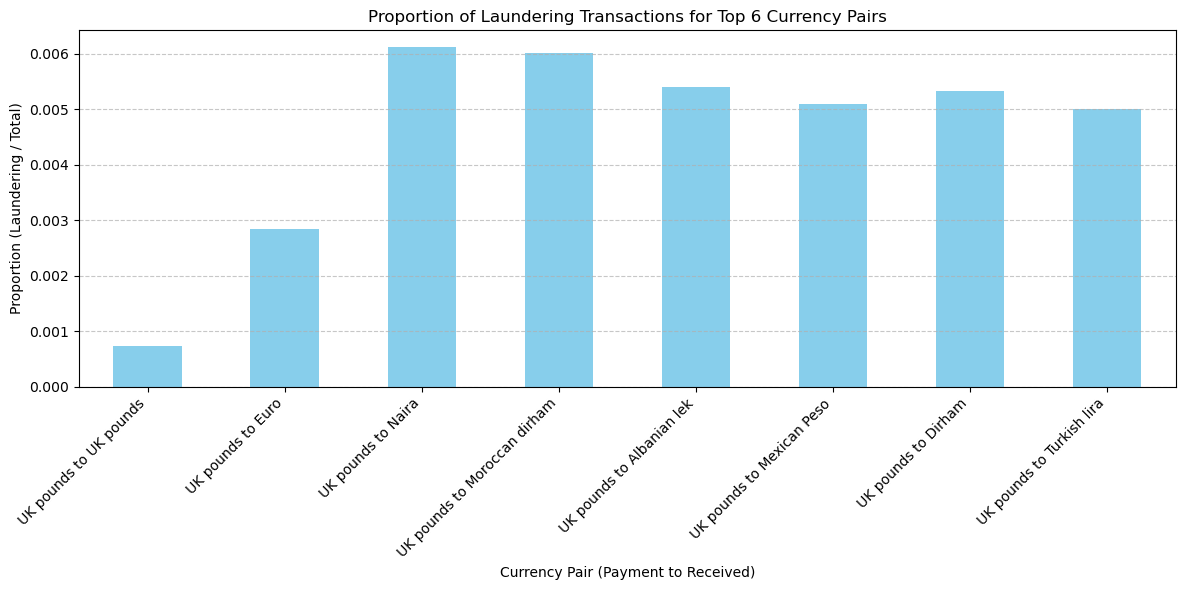

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['currency_pair'] = df['Payment_currency'] + ' to ' + df['Received_currency']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['currency_pair'].value_counts()

# Calculate total counts for each currency pair (including is_laundering 0 and 1)
total_counts = df['currency_pair'].value_counts()

# Select top 6 currency pairs based on laundering counts
top6_pairs = laundering_counts.head(8).index

# Filter counts and total counts for top 6 pairs
laundering_counts_top6 = laundering_counts[top6_pairs]
total_counts_top6 = total_counts[top6_pairs]

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts_top6 / total_counts_top6
proportions = proportions.fillna(0)  # Replace NaN with 0 for pairs with no laundering

# Create bar plot
plt.figure(figsize=(12, 6))
proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Laundering Transactions for Top 6 Currency Pairs')
plt.xlabel('Currency Pair (Payment to Received)')
plt.ylabel('Proportion (Laundering / Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('top6_currency_pairs_laundering_proportion.png')

# Show the plot
plt.show()

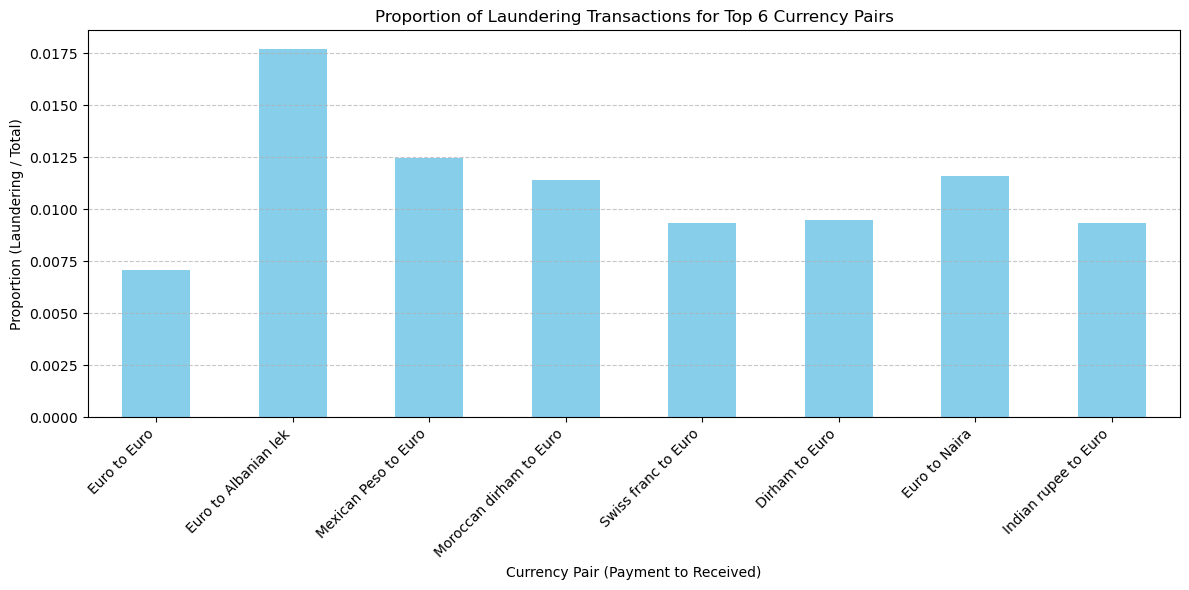

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['currency_pair'] = df[df["Payment_currency"] != "UK pounds"]['Payment_currency'] + ' to ' + df[df["Received_currency"] != "UK pounds"]['Received_currency']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['currency_pair'].value_counts()

# Calculate total counts for each currency pair (including is_laundering 0 and 1)
total_counts = df['currency_pair'].value_counts()

# Select top 6 currency pairs based on laundering counts
top6_pairs = laundering_counts.head(8).index

# Filter counts and total counts for top 6 pairs
laundering_counts_top6 = laundering_counts[top6_pairs]
total_counts_top6 = total_counts[top6_pairs]

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts_top6 / total_counts_top6
proportions = proportions.fillna(0)  # Replace NaN with 0 for pairs with no laundering

# Create bar plot
plt.figure(figsize=(12, 6))
proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Laundering Transactions for Top 6 Currency Pairs')
plt.xlabel('Currency Pair (Payment to Received)')
plt.ylabel('Proportion (Laundering / Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('top6_currency_pairs_laundering_proportion.png')

# Show the plot
plt.show()

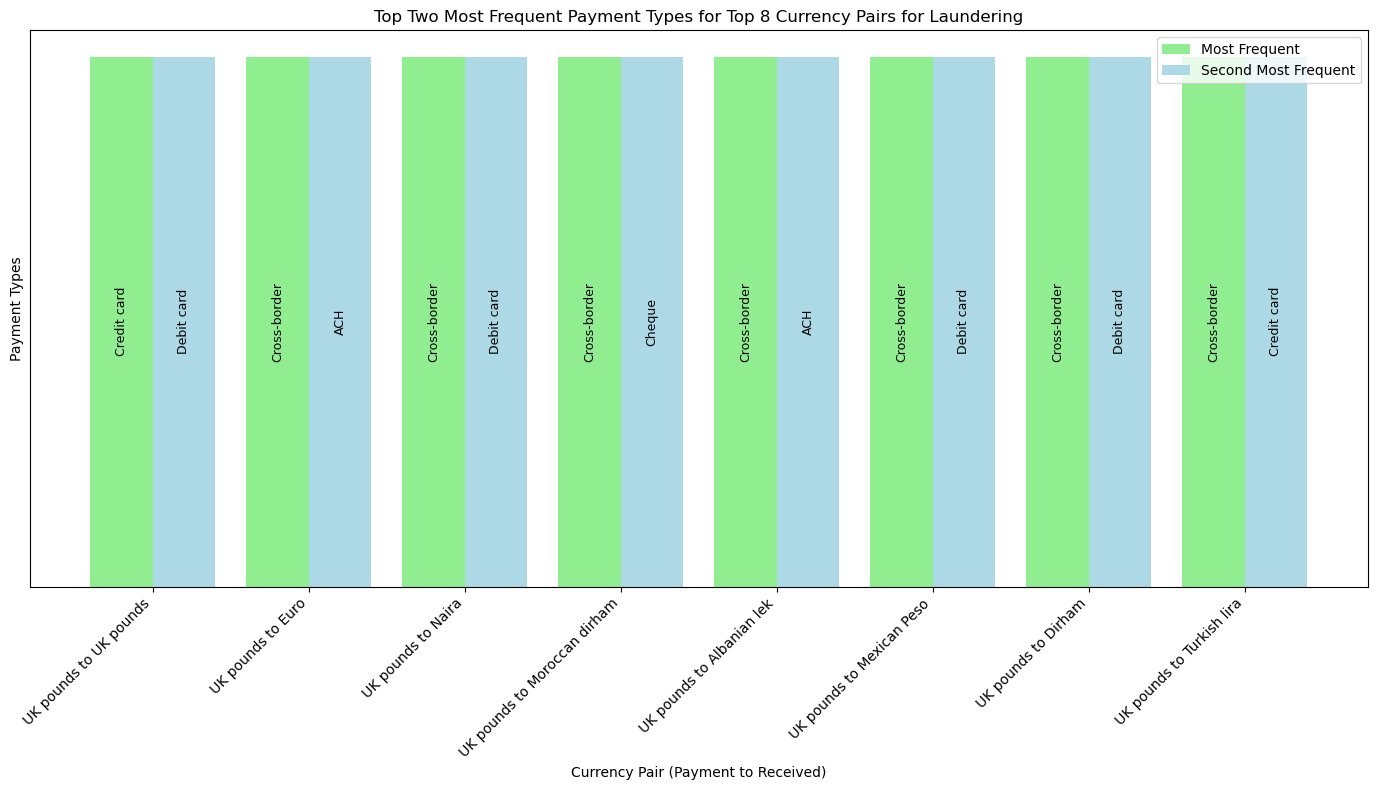


Top Two Payment Types for Each Currency Pair:
UK pounds to UK pounds: 1. Credit card, 2. Debit card
UK pounds to Euro: 1. Cross-border, 2. ACH
UK pounds to Naira: 1. Cross-border, 2. Debit card
UK pounds to Moroccan dirham: 1. Cross-border, 2. Cheque
UK pounds to Albanian lek: 1. Cross-border, 2. ACH
UK pounds to Mexican Peso: 1. Cross-border, 2. Debit card
UK pounds to Dirham: 1. Cross-border, 2. Debit card
UK pounds to Turkish lira: 1. Cross-border, 2. Credit card


In [305]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['currency_pair'] = df['Payment_currency'] + ' to ' + df['Received_currency']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['currency_pair'].value_counts()

# Select top 8 currency pairs based on laundering counts
top8_pairs = laundering_counts.head(8).index

# Filter the DataFrame to include only the top 8 currency pairs
filtered_df = df[df['currency_pair'].isin(top8_pairs)]

# Create a dictionary to store the top two payment types for each currency pair
top_payment_types = {}

# Get top two payment types for each currency pair
for pair in top8_pairs:
    pair_df = filtered_df[filtered_df['currency_pair'] == pair]
    payment_counts = pair_df['Payment_type'].value_counts()
    
    if len(payment_counts) >= 2:
        top1 = payment_counts.index[0]
        top2 = payment_counts.index[1]
    elif len(payment_counts) == 1:
        top1 = payment_counts.index[0]
        top2 = 'None'
    else:
        top1 = 'None'
        top2 = 'None'
    
    top_payment_types[pair] = {'top1': top1, 'top2': top2}

# Create a stacked bar plot with currency pairs on x-axis
plt.figure(figsize=(14, 8))

x = range(len(top8_pairs))
width = 0.4

# Create the first set of bars for the most frequent payment type
bars1 = plt.bar(x, [1] * len(top8_pairs), width, color='lightgreen', label='Most Frequent')

# Create the second set of bars for the second most frequent payment type
bars2 = plt.bar([i + width for i in x], [1] * len(top8_pairs), width, color='lightblue', label='Second Most Frequent')

plt.title('Top Two Most Frequent Payment Types for Top 8 Currency Pairs for Laundering')
plt.xlabel('Currency Pair (Payment to Received)')
plt.ylabel('Payment Types')
plt.xticks([i + width/2 for i in x], top8_pairs, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate each bar with the corresponding Payment_type
for i, pair in enumerate(top8_pairs):
    # Annotate the first bar
    plt.text(
        i + width/2 - 0.2,  # Center of the first bar
        0.5,  # Middle of the bar
        top_payment_types[pair]['top1'],
        ha='center', va='center', fontsize=9, color='black', rotation=90
    )
    
    # Annotate the second bar
    plt.text(
        i + width + width/2 - 0.2,  # Center of the second bar
        0.5,  # Middle of the bar
        top_payment_types[pair]['top2'],
        ha='center', va='center', fontsize=9, color='black', rotation=90
    )

# Remove y-axis ticks since the height is arbitrary
plt.yticks([])

plt.tight_layout()

# Show the plot
plt.show()

# Print the results for reference
print("\nTop Two Payment Types for Each Currency Pair:")
for pair, types in top_payment_types.items():
    print(f"{pair}: 1. {types['top1']}, 2. {types['top2']}")

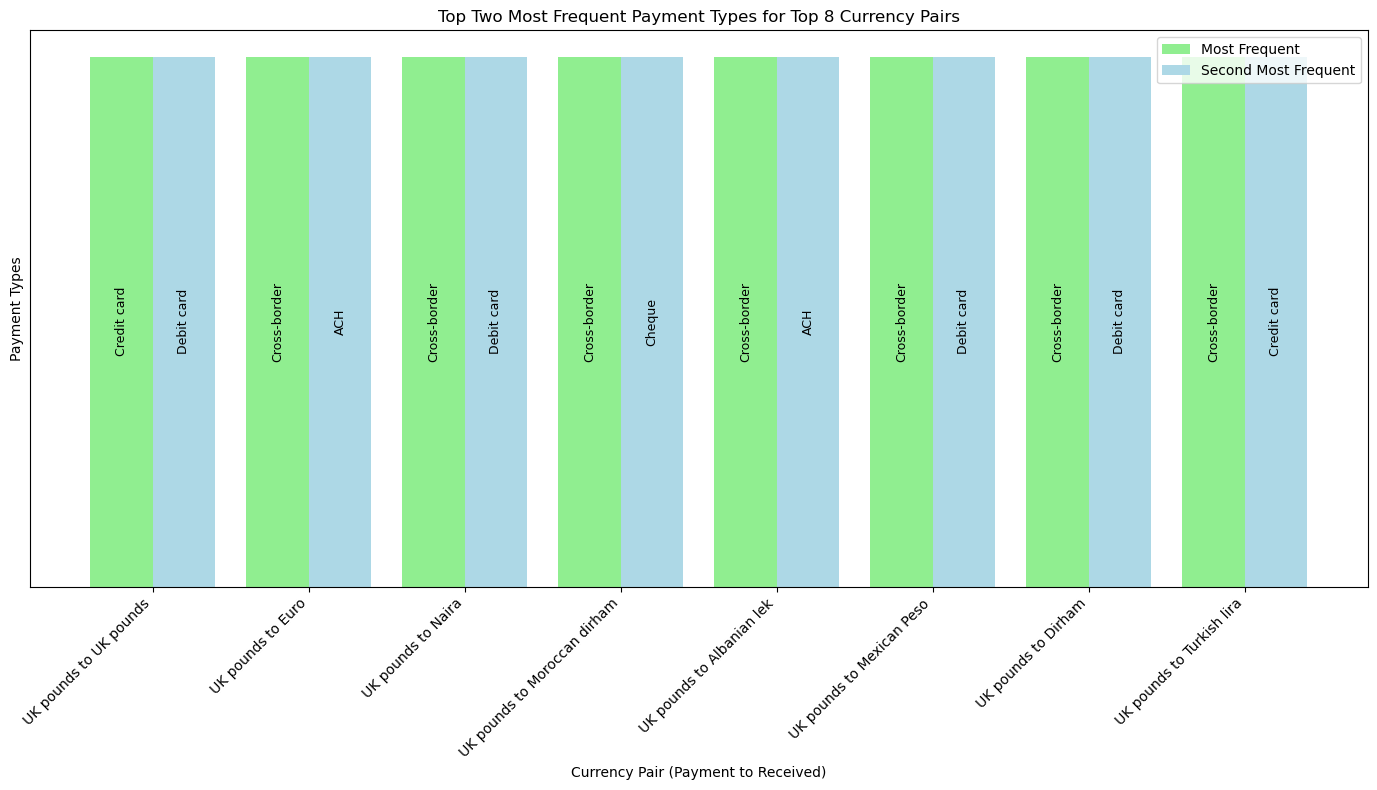

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['currency_pair'] = df['Payment_currency'] + ' to ' + df['Received_currency']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['currency_pair'].value_counts()

# Select top 8 currency pairs based on laundering counts
top8_pairs = laundering_counts.head(8).index

# Filter the DataFrame to include only the top 8 currency pairs
filtered_df = df[df['currency_pair'].isin(top8_pairs)]

# Create a dictionary to store the top two payment types for each currency pair
top_payment_types = {}

# Get top two payment types for each currency pair
for pair in top8_pairs:
    pair_df = filtered_df[filtered_df['currency_pair'] == pair]
    payment_counts = pair_df['Payment_type'].value_counts()
    
    if len(payment_counts) >= 2:
        top1 = payment_counts.index[0]
        top2 = payment_counts.index[1]
    elif len(payment_counts) == 1:
        top1 = payment_counts.index[0]
        top2 = 'None'
    else:
        top1 = 'None'
        top2 = 'None'
    
    top_payment_types[pair] = {'top1': top1, 'top2': top2}

# Create a stacked bar plot with currency pairs on x-axis
plt.figure(figsize=(14, 8))

x = range(len(top8_pairs))
width = 0.4

# Create the first set of bars for the most frequent payment type
bars1 = plt.bar(x, [1] * len(top8_pairs), width, color='lightgreen', label='Most Frequent')

# Create the second set of bars for the second most frequent payment type
bars2 = plt.bar([i + width for i in x], [1] * len(top8_pairs), width, color='lightblue', label='Second Most Frequent')

plt.title('Top Two Most Frequent Payment Types for Top 8 Currency Pairs')
plt.xlabel('Currency Pair (Payment to Received)')
plt.ylabel('Payment Types')
plt.xticks([i + width/2 for i in x], top8_pairs, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate each bar with the corresponding Payment_type
for i, pair in enumerate(top8_pairs):
    # Annotate the first bar
    plt.text(
        i + width/2 - 0.2,  # Center of the first bar
        0.5,  # Middle of the bar
        top_payment_types[pair]['top1'],
        ha='center', va='center', fontsize=9, color='black', rotation=90
    )
    
    # Annotate the second bar
    plt.text(
        i + width + width/2 - 0.2,  # Center of the second bar
        0.5,  # Middle of the bar
        top_payment_types[pair]['top2'],
        ha='center', va='center', fontsize=9, color='black', rotation=90
    )

# Remove y-axis ticks since the height is arbitrary
plt.yticks([])

plt.tight_layout()

# Save the plot
plt.savefig('top_two_payment_types_top8_currency_pairs.png')


Top Two Payment Types for Each Currency Pair (Excluding Cross-border):
UK pounds to UK pounds: 1. Credit card, 2. Debit card
UK pounds to Euro: 1. ACH, 2. Credit card
UK pounds to Naira: 1. Debit card, 2. ACH
UK pounds to Moroccan dirham: 1. Cheque, 2. Debit card
UK pounds to Albanian lek: 1. ACH, 2. Credit card
UK pounds to Mexican Peso: 1. Debit card, 2. Cheque
UK pounds to Dirham: 1. Debit card, 2. Credit card
UK pounds to Turkish lira: 1. Credit card, 2. Debit card


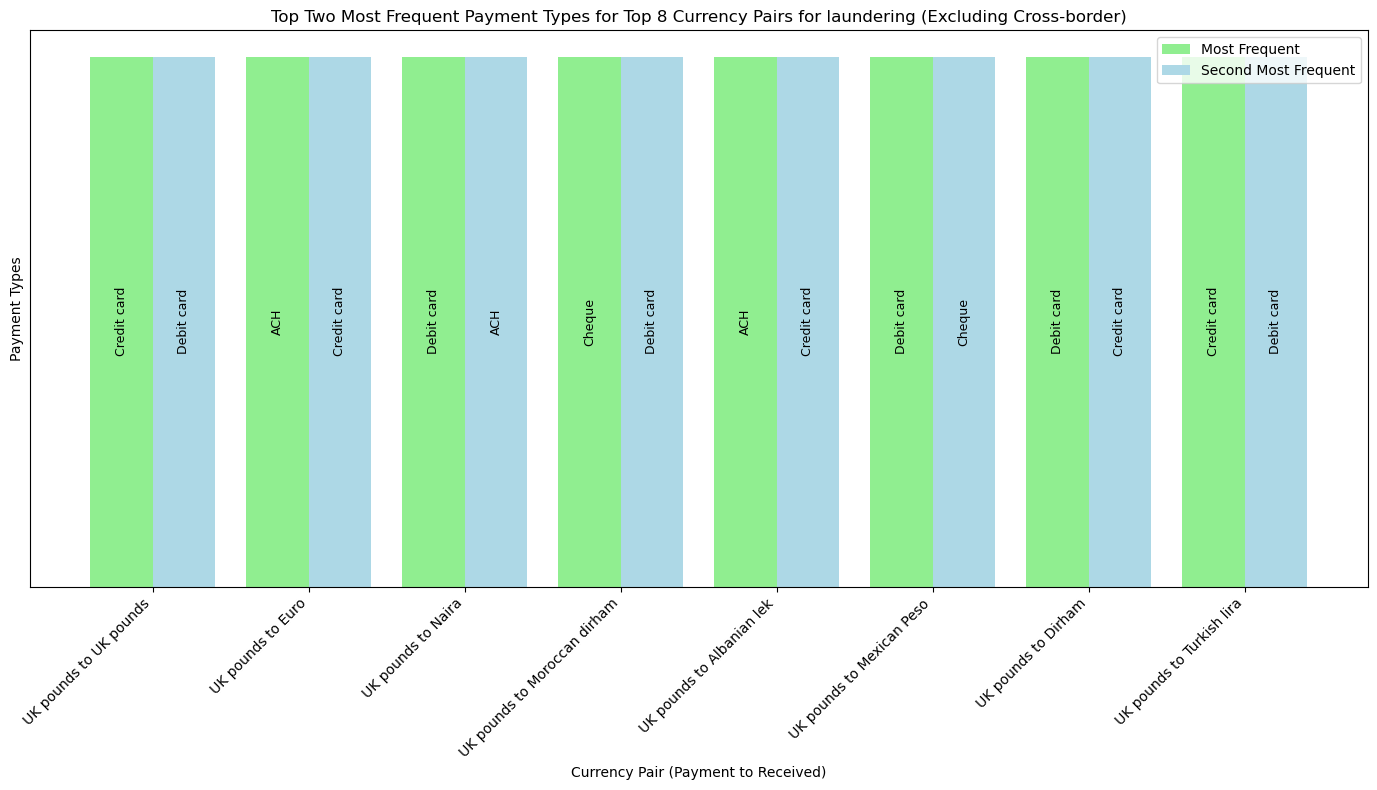

In [306]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['currency_pair'] = df['Payment_currency'] + ' to ' + df['Received_currency']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['currency_pair'].value_counts()

# Select top 8 currency pairs based on laundering counts
top8_pairs = laundering_counts.head(8).index

# Filter the DataFrame to include only the top 8 currency pairs
filtered_df = df[df['currency_pair'].isin(top8_pairs)]

# Create a dictionary to store the top two payment types for each currency pair
top_payment_types = {}

# Get top two payment types for each currency pair, excluding Cross-border
for pair in top8_pairs:
    pair_df = filtered_df[(filtered_df['currency_pair'] == pair) & (filtered_df['Payment_type'] != 'Cross-border')]
    payment_counts = pair_df['Payment_type'].value_counts()
    
    if len(payment_counts) >= 2:
        top1 = payment_counts.index[0]
        top2 = payment_counts.index[1]
    elif len(payment_counts) == 1:
        top1 = payment_counts.index[0]
        top2 = 'None'
    else:
        top1 = 'None'
        top2 = 'None'
    
    top_payment_types[pair] = {'top1': top1, 'top2': top2}

# Create a stacked bar plot with currency pairs on x-axis
plt.figure(figsize=(14, 8))

x = range(len(top8_pairs))
width = 0.4

# Create the first set of bars for the most frequent payment type
bars1 = plt.bar(x, [1] * len(top8_pairs), width, color='lightgreen', label='Most Frequent')

# Create the second set of bars for the second most frequent payment type
bars2 = plt.bar([i + width for i in x], [1] * len(top8_pairs), width, color='lightblue', label='Second Most Frequent')

plt.title('Top Two Most Frequent Payment Types for Top 8 Currency Pairs for laundering (Excluding Cross-border)')
plt.xlabel('Currency Pair (Payment to Received)')
plt.ylabel('Payment Types')
plt.xticks([i + width/2 for i in x], top8_pairs, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate each bar with the corresponding Payment_type
for i, pair in enumerate(top8_pairs):
    # Annotate the first bar
    plt.text(
        i + width/2 - 0.2,  # Center of the first bar
        0.5,  # Middle of the bar
        top_payment_types[pair]['top1'],
        ha='center', va='center', fontsize=9, color='black', rotation=90
    )
    
    # Annotate the second bar
    plt.text(
        i + width + width/2 - 0.2,  # Center of the second bar
        0.5,  # Middle of the bar
        top_payment_types[pair]['top2'],
        ha='center', va='center', fontsize=9, color='black', rotation=90
    )

# Remove y-axis ticks since the height is arbitrary
plt.yticks([])

plt.tight_layout()

# Save the plot
plt.savefig('top_two_payment_types_top8_currency_pairs_no_crossborder.png')

# Print the results for reference
print("\nTop Two Payment Types for Each Currency Pair (Excluding Cross-border):")
for pair, types in top_payment_types.items():
    print(f"{pair}: 1. {types['top1']}, 2. {types['top2']}")


Top Two Payment Types for Each Currency Pair (Excluding UK Pounds and Cross-border):
Euro to Euro: 1. Credit card, 2. Cheque
Euro to Albanian lek: 1. Credit card, 2. ACH
Mexican Peso to Euro: 1. Cheque, 2. ACH
Moroccan dirham to Euro: 1. Debit card, 2. Cheque
Swiss franc to Euro: 1. Cheque, 2. Credit card
Dirham to Euro: 1. Cheque, 2. Credit card
Euro to Naira: 1. Debit card, 2. ACH
Indian rupee to Euro: 1. Cheque, 2. Debit card


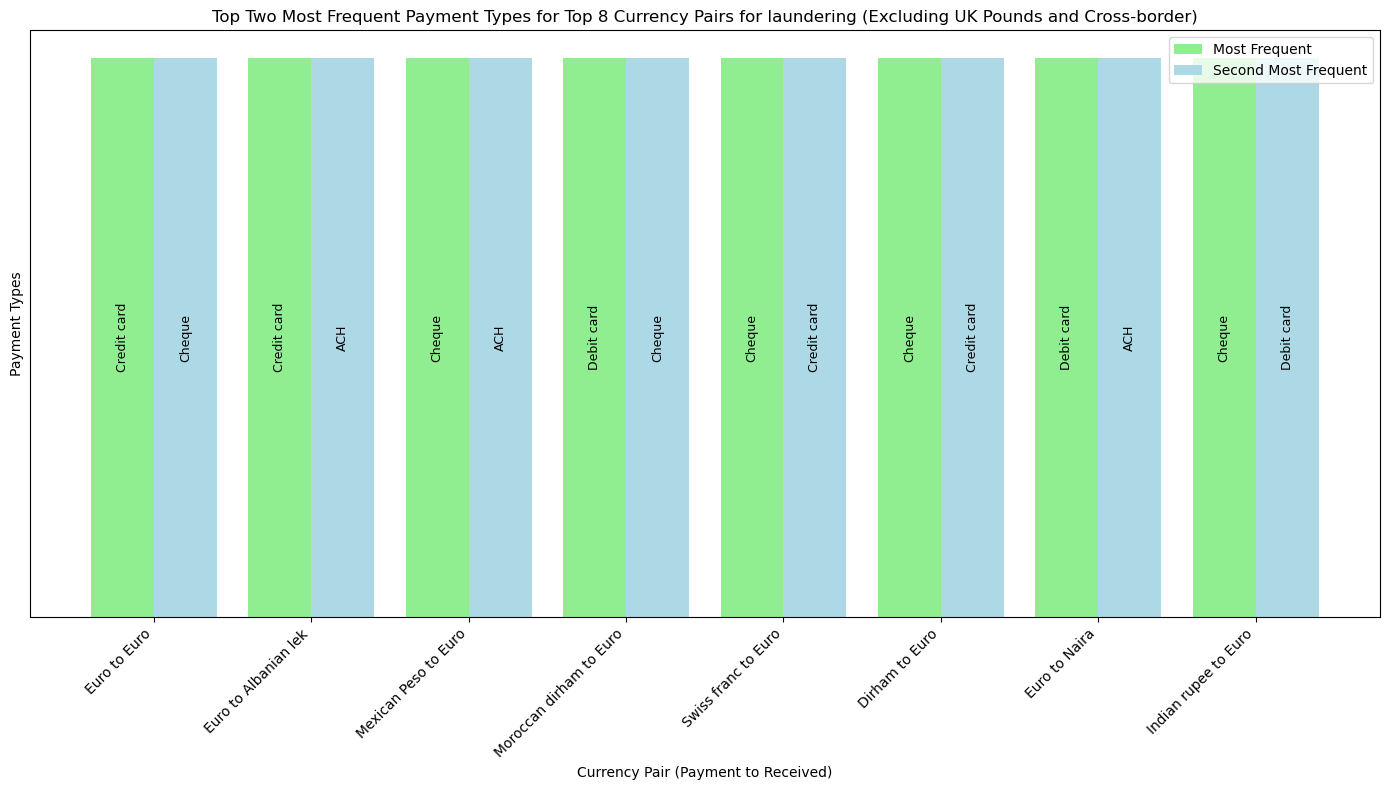

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['currency_pair'] = df[df["Payment_currency"] != "UK pounds"]['Payment_currency'] + ' to ' + df[df["Received_currency"] != "UK pounds"]['Received_currency']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['currency_pair'].value_counts()

# Select top 8 currency pairs based on laundering counts
top8_pairs = laundering_counts.head(8).index

# Filter the DataFrame to include only the top 8 currency pairs
filtered_df = df[df['currency_pair'].isin(top8_pairs)]

# Create a dictionary to store the top two payment types for each currency pair
top_payment_types = {}

# Get top two payment types for each currency pair, excluding Cross-border
for pair in top8_pairs:
    pair_df = filtered_df[(filtered_df['currency_pair'] == pair) & (filtered_df['Payment_type'] != 'Cross-border')]
    payment_counts = pair_df['Payment_type'].value_counts()
    
    if len(payment_counts) >= 2:
        top1 = payment_counts.index[0]
        top2 = payment_counts.index[1]
    elif len(payment_counts) == 1:
        top1 = payment_counts.index[0]
        top2 = 'None'
    else:
        top1 = 'None'
        top2 = 'None'
    
    top_payment_types[pair] = {'top1': top1, 'top2': top2}

# Create a stacked bar plot with currency pairs on x-axis
plt.figure(figsize=(14, 8))

x = range(len(top8_pairs))
width = 0.4

# Create the first set of bars for the most frequent payment type
bars1 = plt.bar(x, [1] * len(top8_pairs), width, color='lightgreen', label='Most Frequent')

# Create the second set of bars for the second most frequent payment type
bars2 = plt.bar([i + width for i in x], [1] * len(top8_pairs), width, color='lightblue', label='Second Most Frequent')

plt.title('Top Two Most Frequent Payment Types for Top 8 Currency Pairs for laundering (Excluding UK Pounds and Cross-border)')
plt.xlabel('Currency Pair (Payment to Received)')
plt.ylabel('Payment Types')
plt.xticks([i + width/2 for i in x], top8_pairs, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate each bar with the corresponding Payment_type
for i, pair in enumerate(top8_pairs):
    # Annotate the first bar
    plt.text(
        i + width/2 - 0.2,  # Center of the first bar
        0.5,  # Middle of the bar
        top_payment_types[pair]['top1'],
        ha='center', va='center', fontsize=9, color='black', rotation=90
    )
    
    # Annotate the second bar
    plt.text(
        i + width + width/2 - 0.2,  # Center of the second bar
        0.5,  # Middle of the bar
        top_payment_types[pair]['top2'],
        ha='center', va='center', fontsize=9, color='black', rotation=90
    )

# Remove y-axis ticks since the height is arbitrary
plt.yticks([])

plt.tight_layout()

# Save the plot
plt.savefig('top_two_payment_types_top8_currency_pairs_no_ukpounds_no_crossborder.png')

# Print the results for reference
print("\nTop Two Payment Types for Each Currency Pair (Excluding UK Pounds and Cross-border):")
for pair, types in top_payment_types.items():
    print(f"{pair}: 1. {types['top1']}, 2. {types['top2']}")

In [120]:
filtered_df["Payment_type"].value_counts()

Payment_type
Cross-border    8117
Credit card      167
Cheque           152
Debit card       125
ACH              124
Name: count, dtype: int64

In [73]:
df[df["Is_laundering"] == 1]["Sender_account"].value_counts().mean()

1.9945454545454546

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34096\4062332396.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_payment_currencies.index, y=top_payment_currencies.values, palette='viridis', ax=axes[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34096\4062332396.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_received_currencies.index, y=top_received_currencies.values, palette='plasma', ax=axes[1])


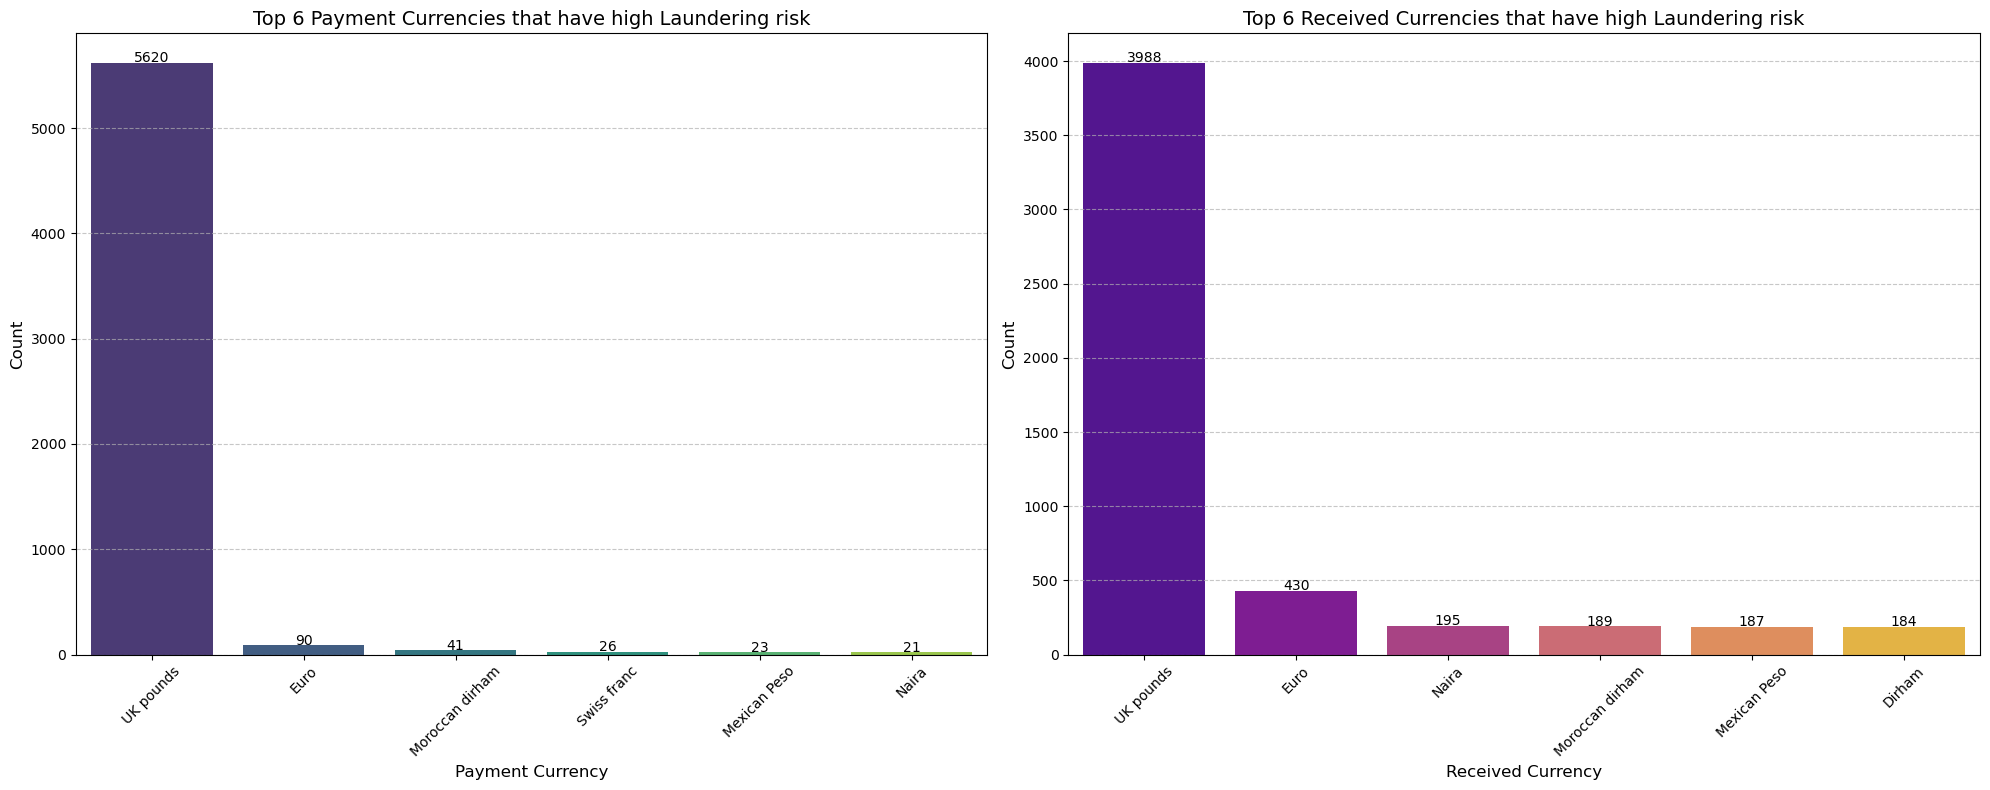

Top Payment Currencies:
Payment_currency
UK pounds          5620
Euro                 90
Moroccan dirham      41
Swiss franc          26
Mexican Peso         23
Naira                21
Name: count, dtype: int64

Top Received Currencies:
Received_currency
UK pounds          3988
Euro                430
Naira               195
Moroccan dirham     189
Mexican Peso        187
Dirham              184
Name: count, dtype: int64


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Find sender accounts with more than 300 transactions that are laundering
high_volume_laundering_accounts = df[df['Is_laundering'] == 1]['Sender_account'].value_counts()
high_volume_laundering_accounts = high_volume_laundering_accounts[high_volume_laundering_accounts > 1].index

# Step 2: Filter the DataFrame to only these high-volume laundering accounts
filtered_df = df[(df['Sender_account'].isin(high_volume_laundering_accounts)) & (df['Is_laundering'] == 1)]

# Step 3: Get the top 6 Payment_currency values for these accounts
top_payment_currencies = filtered_df['Payment_currency'].value_counts().head(6)

# Step 4: Get the top 6 Received_currency values for these accounts
top_received_currencies = filtered_df['Received_currency'].value_counts().head(6)

# Step 5: Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Top 6 Payment Currencies
sns.barplot(x=top_payment_currencies.index, y=top_payment_currencies.values, palette='viridis', ax=axes[0])
axes[0].set_title('Top 6 Payment Currencies that have high Laundering risk', fontsize=14)
axes[0].set_xlabel('Payment Currency', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels to the first plot
for i, v in enumerate(top_payment_currencies.values):
    axes[0].text(i, v + 5, str(v), ha='center')

# Plot 2: Top 6 Received Currencies
sns.barplot(x=top_received_currencies.index, y=top_received_currencies.values, palette='plasma', ax=axes[1])
axes[1].set_title('Top 6 Received Currencies that have high Laundering risk', fontsize=14)
axes[1].set_xlabel('Received Currency', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels to the second plot
for i, v in enumerate(top_received_currencies.values):
    axes[1].text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.savefig('top_currencies_for_high_volume_laundering.png', dpi=300)
plt.show()

# Print the actual counts for reference
print("Top Payment Currencies:")
print(top_payment_currencies)
print("\nTop Received Currencies:")
print(top_received_currencies)

In [161]:
filtered_df = df[df["Is_laundering"] == 1]
filtered_df

Time        Date  Sender_account  Receiver_account   Amount  \
317      10:46:37  2022-10-07      7401327478        4336451277  2603.30   
1206     11:19:32  2022-10-07      6340007440        4316483340   106.04   
1649     11:35:42  2022-10-07      3758118046        6081504025  5903.33   
1954     11:45:53  2022-10-07       445154846        4497771501  3957.87   
3304     12:39:03  2022-10-07      2758469152        2987279234  7832.41   
...           ...         ...             ...               ...      ...   
9499725  07:56:34  2023-08-23      6347914836        8661825378  6702.17   
9501820  09:12:18  2023-08-23      9285879778           7750754   814.49   
9501946  09:16:07  2023-08-23       351184098        4257557167  7888.58   
9503705  10:18:07  2023-08-23      7929569569        8236488006 30061.13   
9504744  10:53:52  2023-08-23      2346864590        2116866170  1436.69   

        Payment_currency Received_currency Sender_bank_location  \
317            UK pounds         UK pounds                   UK   
1206           UK pounds      Indian rupee                   UK   
1649           UK pounds      Mexican Peso                   UK   
1954           UK pounds             Naira                   UK   
3304           UK pounds         UK pounds                   UK   
...                  ...               ...                  ...   
9499725        UK pounds         US dollar                   UK   
9501820        UK pounds              Euro                   UK   
9501946        UK pounds      Turkish lira                   UK   
9503705        UK pounds         UK pounds                   UK   
9504744        UK pounds              Euro                   UK   

        Receiver_bank_location     Payment_type Is_laundering  \
317                         UK     Cash Deposit             1   
1206                     India  Cash Withdrawal             1   
1649                    Mexico     Cross-border             1   
1954                   Nigeria     Cross-border             1   
3304                        UK       Debit card             1   
...                        ...              ...           ...   
9499725                    USA     Cross-border             1   
9501820                Austria     Cross-border             1   
9501946                 Turkey     Cross-border             1   
9503705                     UK      Credit card             1   
9504744                Austria     Cross-border             1   

              Laundering_type currency_pair country_pair  \
317                  Smurfing           NaN          NaN   
1206          Cash_Withdrawal           NaN          NaN   
1649     Behavioural_Change_2           NaN          NaN   
1954              Structuring           NaN          NaN   
3304              Structuring           NaN          NaN   
...                       ...           ...          ...   
9499725        Layered_Fan_In           NaN          NaN   
9501820  Behavioural_Change_1           NaN          NaN   
9501946  Behavioural_Change_2           NaN          NaN   
9503705                 Cycle           NaN          NaN   
9504744          Deposit-Send           NaN          NaN   

        Sender_bank_location_group Receiver_bank_location_group  
317                             UK                           UK  
1206                            UK                        India  
1649                            UK                       Mexico  
1954                            UK                      Nigeria  
3304                            UK                           UK  
...                            ...                          ...  
9499725                         UK                          USA  
9501820                         UK        High-Volume Economies  
9501946                         UK                       Turkey  
9503705                         UK                           UK  
9504744                         UK        High-Volume Economies  



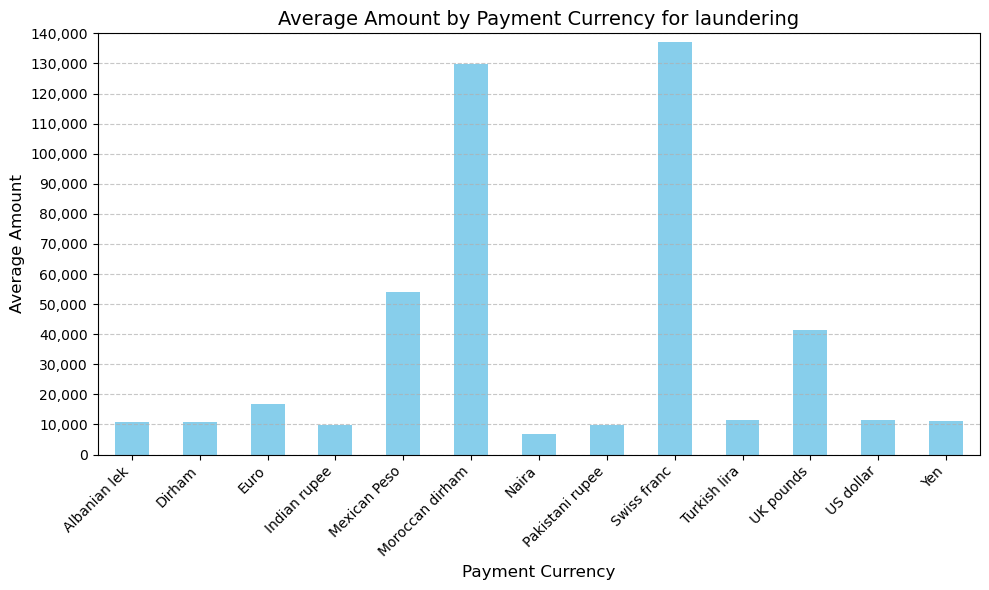

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Create the bar plot
ax = filtered_df.groupby(["Payment_currency"])["Amount"].mean().plot(kind='bar', figsize=(10, 6), color='skyblue')

# Define the custom y-axis ticks
y_ticks = np.arange(0, 140001, 10000)  # Creates [20000, 30000, 40000, ..., 140000]

# Set the y-axis ticks and limits
plt.yticks(y_ticks)
plt.ylim(0, 140000)  # Set the y-axis limits to match our tick range

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve the appearance with labels and title
plt.title('Average Amount by Payment Currency for laundering', fontsize=14)
plt.xlabel('Payment Currency', fontsize=12)
plt.ylabel('Average Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Format y-axis labels with comma separators for thousands
# Using a different approach to avoid the formatter error
def comma_formatter(x, pos):
    return f'{x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma_formatter))

plt.tight_layout()
plt.show()

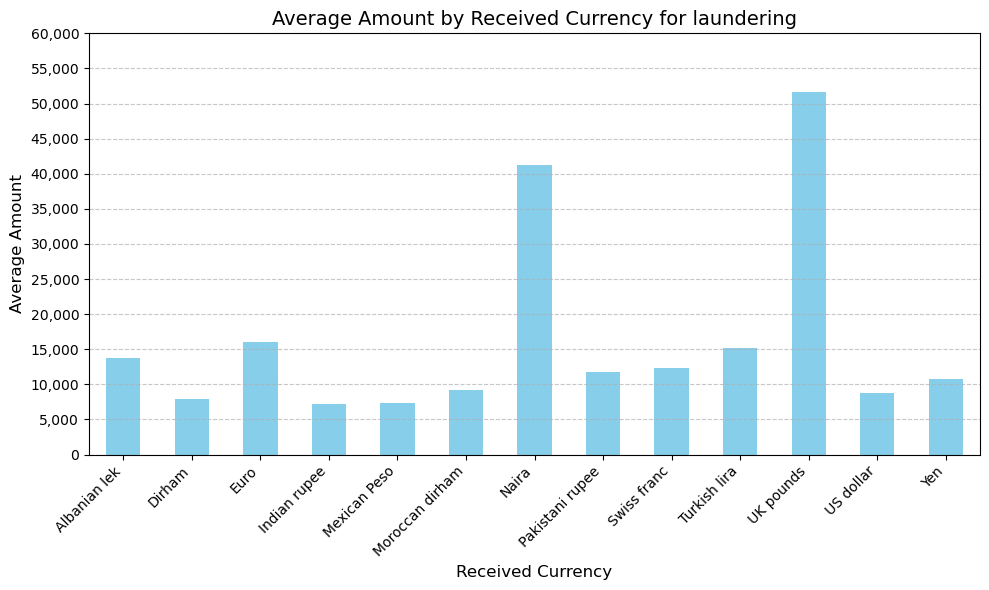

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Create the bar plot
ax = filtered_df.groupby(["Received_currency"])["Amount"].mean().plot(kind='bar', figsize=(10, 6), color='skyblue')

# Define the custom y-axis ticks
y_ticks = np.arange(0, 60001, 5000)  # Creates [20000, 30000, 40000, ..., 140000]

# Set the y-axis ticks and limits
plt.yticks(y_ticks)
plt.ylim(0, 60001)  # Set the y-axis limits to match our tick range

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve the appearance with labels and title
plt.title('Average Amount by Received Currency for laundering', fontsize=14)
plt.xlabel('Received Currency', fontsize=12)
plt.ylabel('Average Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Format y-axis labels with comma separators for thousands
# Using a different approach to avoid the formatter error
def comma_formatter(x, pos):
    return f'{x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma_formatter))

plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34096\2471619621.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10711.803622617685' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  combined_data.loc[currency, 'Payment'] = payment_avg[currency]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34096\2471619621.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13691.790360299834' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  combined_data.loc[currency, 'Received'] = received_avg[currency]


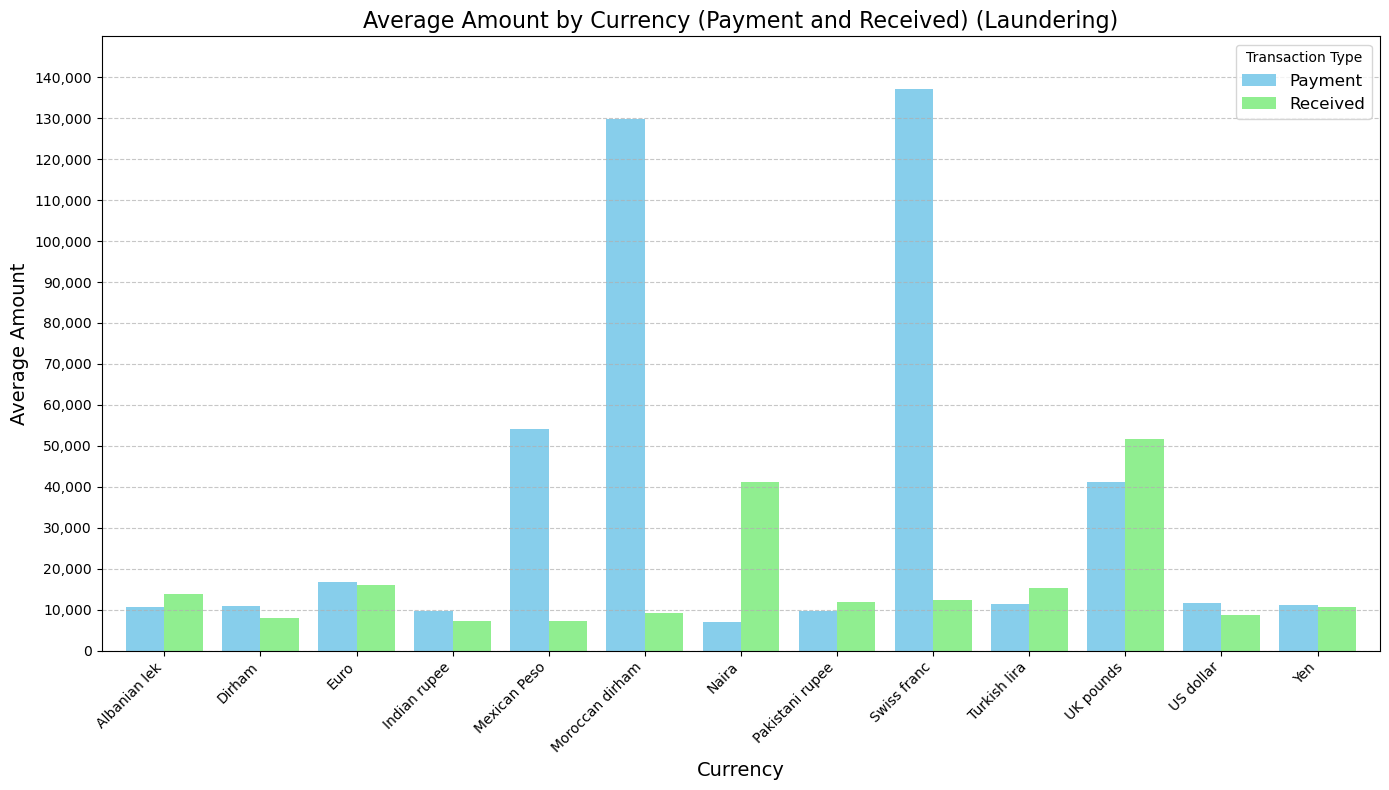

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd

# Calculate the average amounts for Payment and Received currencies
payment_avg = filtered_df.groupby(["Payment_currency"])["Amount"].mean()
received_avg = filtered_df.groupby(["Received_currency"])["Amount"].mean()

# Create a DataFrame with both sets of averages
# First, let's get all unique currencies
all_currencies = sorted(set(payment_avg.index) | set(received_avg.index))

# Create a DataFrame with zeros, then fill in the values we have
combined_data = pd.DataFrame(0, index=all_currencies, columns=['Payment', 'Received'])

# Fill in the values where we have data
for currency in payment_avg.index:
    combined_data.loc[currency, 'Payment'] = payment_avg[currency]
    
for currency in received_avg.index:
    combined_data.loc[currency, 'Received'] = received_avg[currency]

# Create the grouped bar plot (side by side bars)
fig, ax = plt.subplots(figsize=(14, 8))
combined_data.plot(kind='bar', stacked=False, ax=ax, 
                  color=['skyblue', 'lightgreen'], width=0.8)

# Define the custom y-axis ticks
max_value = max(payment_avg.max(), received_avg.max())
max_value = max(max_value, 140000)  # Ensure at least 140,000 as per original requirement
tick_step = 10000
y_ticks = np.arange(0, max_value + tick_step, tick_step)

# Set the y-axis ticks and limits
plt.yticks(y_ticks)
plt.ylim(0, max_value + tick_step)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve the appearance with labels and title
plt.title('Average Amount by Currency (Payment and Received) (Laundering)', fontsize=16)
plt.xlabel('Currency', fontsize=14)
plt.ylabel('Average Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Add legend
plt.legend(title='Transaction Type', fontsize=12)

# Format y-axis labels with comma separators for thousands
def comma_formatter(x, pos):
    return f'{x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma_formatter))


plt.tight_layout()
plt.show()

In [106]:
filtered_df.head(5)

Time        Date  Sender_account  Receiver_account  Amount  \
317   10:46:37  2022-10-07      7401327478        4336451277 2603.30   
1206  11:19:32  2022-10-07      6340007440        4316483340  106.04   
1649  11:35:42  2022-10-07      3758118046        6081504025 5903.33   
1954  11:45:53  2022-10-07       445154846        4497771501 3957.87   
3304  12:39:03  2022-10-07      2758469152        2987279234 7832.41   

     Payment_currency Received_currency Sender_bank_location  \
317         UK pounds         UK pounds                   UK   
1206        UK pounds      Indian rupee                   UK   
1649        UK pounds      Mexican Peso                   UK   
1954        UK pounds             Naira                   UK   
3304        UK pounds         UK pounds                   UK   

     Receiver_bank_location     Payment_type Is_laundering  \
317                      UK     Cash Deposit             1   
1206                  India  Cash Withdrawal             1   
1649                 Mexico     Cross-border             1   
1954                Nigeria     Cross-border             1   
3304                     UK       Debit card             1   

           Laundering_type currency_pair  
317               Smurfing           NaN  
1206       Cash_Withdrawal           NaN  
1649  Behavioural_Change_2           NaN  
1954           Structuring           NaN  
3304           Structuring           NaN

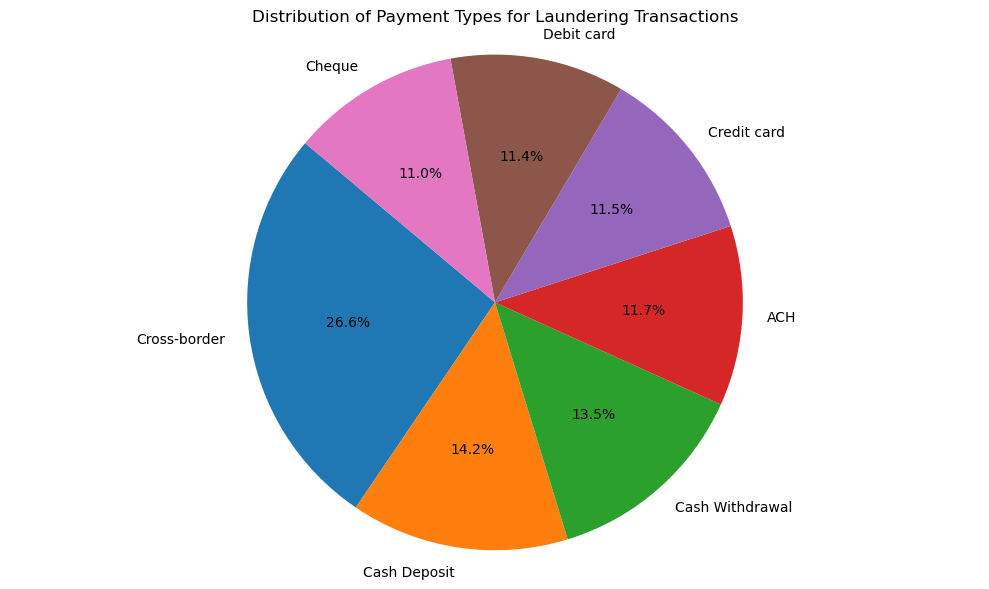

In [309]:
# The issue is in the filtering condition
# Current: df[df["Is_laundering" == 1]]
# This compares the string "Is_laundering" with the value 1, which is incorrect
# Correct: df[df["Is_laundering"] == 1]

# Fixed code:
df[df["Is_laundering"] == 1]["Payment_type"].value_counts().plot(
    kind="pie", 
    figsize=(10, 6),  
    autopct='%1.1f%%', 
    startangle=140,
    title='Distribution of Payment Types for Laundering Transactions',
)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.ylabel('')     # Remove the default "None" label
plt.tight_layout()

In [124]:
filtered_df

Time        Date  Sender_account  Receiver_account   Amount  \
275      10:44:41  2022-10-07      4121324384         148220861  4619.17   
719      11:02:22  2022-10-07      6086421020        7011505686 11280.89   
2590     12:11:05  2022-10-07      4117755003        6646502650  8591.01   
3367     12:41:16  2022-10-07      4121324384         148220861  4666.17   
4906     13:39:23  2022-10-07      1141075854        7662743578 11876.28   
...           ...         ...             ...               ...      ...   
9495264  23:15:47  2023-08-22      7211013217        4957617272  5295.50   
9495585  23:28:25  2023-08-22      7211013217        2124888643 16773.85   
9496119  23:47:38  2023-08-22      7211013217        4957617272  5283.25   
9496466  00:02:07  2023-08-23      2220672185        2757130737  1610.66   
9497906  03:42:07  2023-08-23      2151298927        4596683656 18229.15   

        Payment_currency Received_currency Sender_bank_location  \
275                 Euro              Euro                Spain   
719               Dirham              Euro                   UK   
2590        Indian rupee              Euro                   UK   
3367              Dirham              Euro                Spain   
4906                Euro              Euro               France   
...                  ...               ...                  ...   
9495264             Euro             Naira                Spain   
9495585             Euro              Euro                Spain   
9496119             Euro             Naira                Spain   
9496466     Indian rupee              Euro                India   
9497906      Swiss franc              Euro                   UK   

        Receiver_bank_location  Payment_type Is_laundering  \
275                     France  Cross-border             0   
719                      Italy  Cross-border             0   
2590                    France  Cross-border             0   
3367                    France  Cross-border             0   
4906                   Germany  Cross-border             0   
...                        ...           ...           ...   
9495264                Nigeria  Cross-border             0   
9495585                  Spain    Debit card             0   
9496119                Nigeria  Cross-border             0   
9496466                  Italy  Cross-border             0   
9497906                 France  Cross-border             0   

              Laundering_type         currency_pair  
275            Normal_Fan_Out          Euro to Euro  
719            Normal_Fan_Out        Dirham to Euro  
2590            Normal_Fan_In  Indian rupee to Euro  
3367           Normal_Fan_Out        Dirham to Euro  
4906     Normal_Small_Fan_Out          Euro to Euro  
...                       ...                   ...  
9495264        Normal_Fan_Out         Euro to Naira  
9495585        Normal_Fan_Out          Euro to Euro  
9496119        Normal_Fan_Out         Euro to Naira  
9496466  Normal_Small_Fan_Out  Indian rupee to Euro  
9497906    Normal_Plus_Mutual   Swiss franc to Euro  

[8685 rows x 13 columns]

<Axes: title={'center': 'Top 12 Sender Bank Locations for Laundering'}, xlabel='Sender_bank_location'>

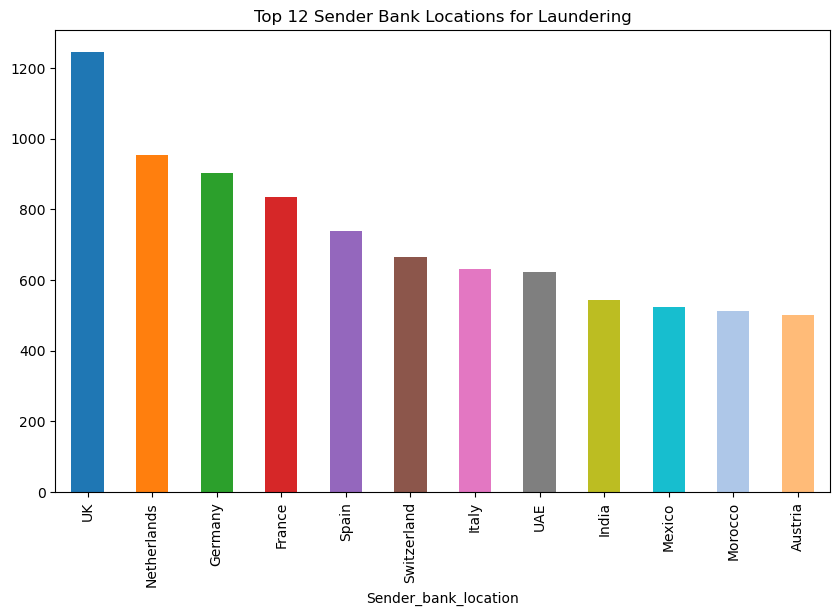

In [310]:
filtered_df["Sender_bank_location"].value_counts().head(12).plot(
    kind='bar', 
    figsize=(10, 6), 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
           '#aec7e8', '#ffbb78'], 
    title="Top 12 Sender Bank Locations for Laundering"
)

<Axes: title={'center': 'Top 12 Sender Bank Locations for Laundering'}, xlabel='Receiver_bank_location'>

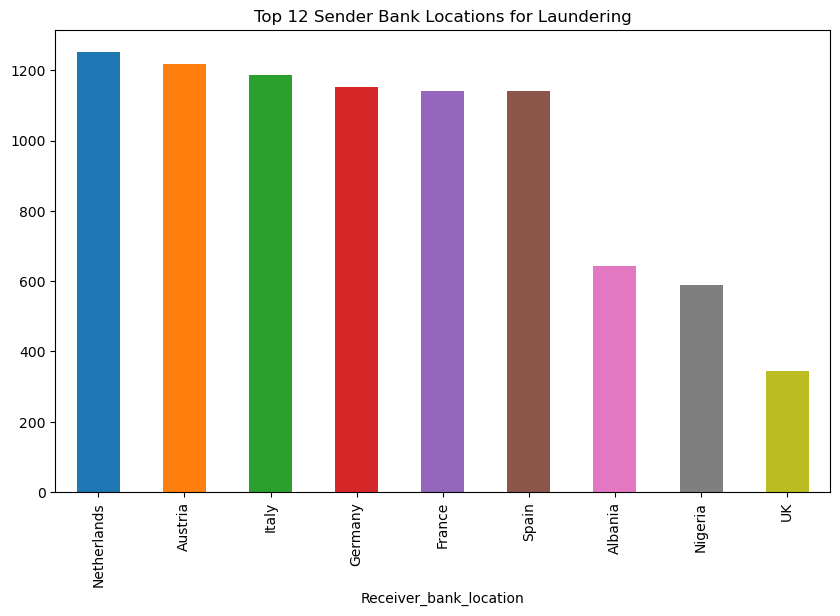

In [312]:
filtered_df["Receiver_bank_location"].value_counts().head(9).plot(
    kind='bar', 
    figsize=(10, 6), 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'], 
    title="Top 12 Sender Bank Locations for Laundering"
)

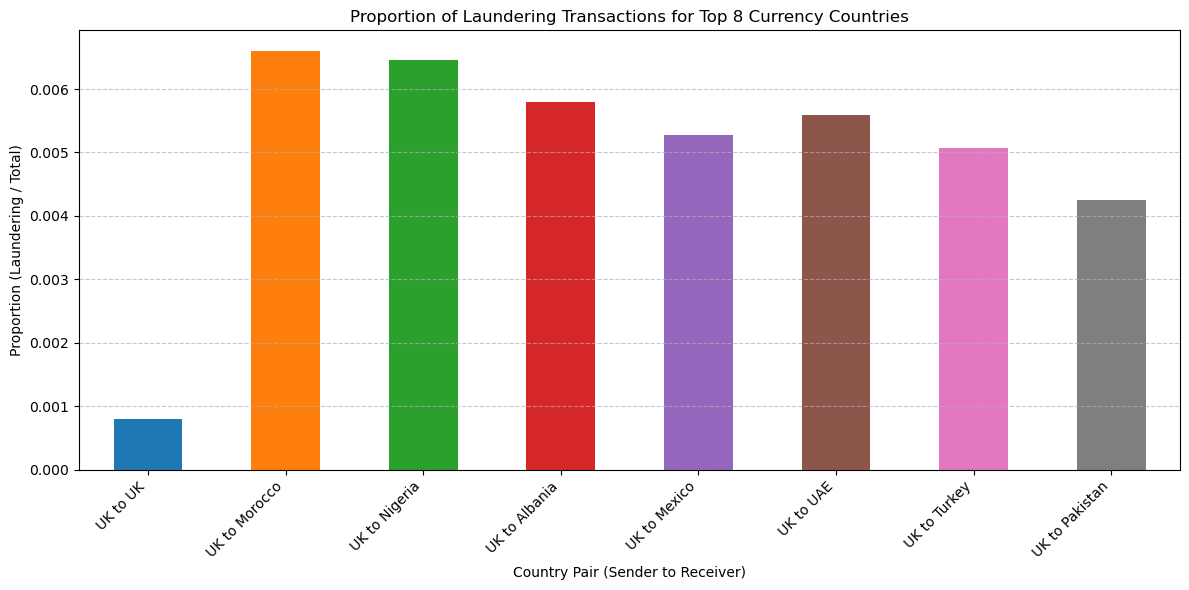

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['country_pair'] = df['Sender_bank_location'] + ' to ' + df['Receiver_bank_location']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['country_pair'].value_counts()

# Calculate total counts for each currency pair (including is_laundering 0 and 1)
total_counts = df['country_pair'].value_counts()

# Select top 6 currency pairs based on laundering counts
top6_pairs = laundering_counts.head(8).index

# Filter counts and total counts for top 6 pairs
laundering_counts_top6 = laundering_counts[top6_pairs]
total_counts_top6 = total_counts[top6_pairs]

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts_top6 / total_counts_top6
proportions = proportions.fillna(0)  # Replace NaN with 0 for pairs with no laundering

# Create bar plot
plt.figure(figsize=(12, 6))
proportions.plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f']
)
plt.title('Proportion of Laundering Transactions for Top 8 Currency Countries')
plt.xlabel('Country Pair (Sender to Receiver)')
plt.ylabel('Proportion (Laundering / Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('top6_country_pairs_laundering_proportion.png')

# Show the plot
plt.show()

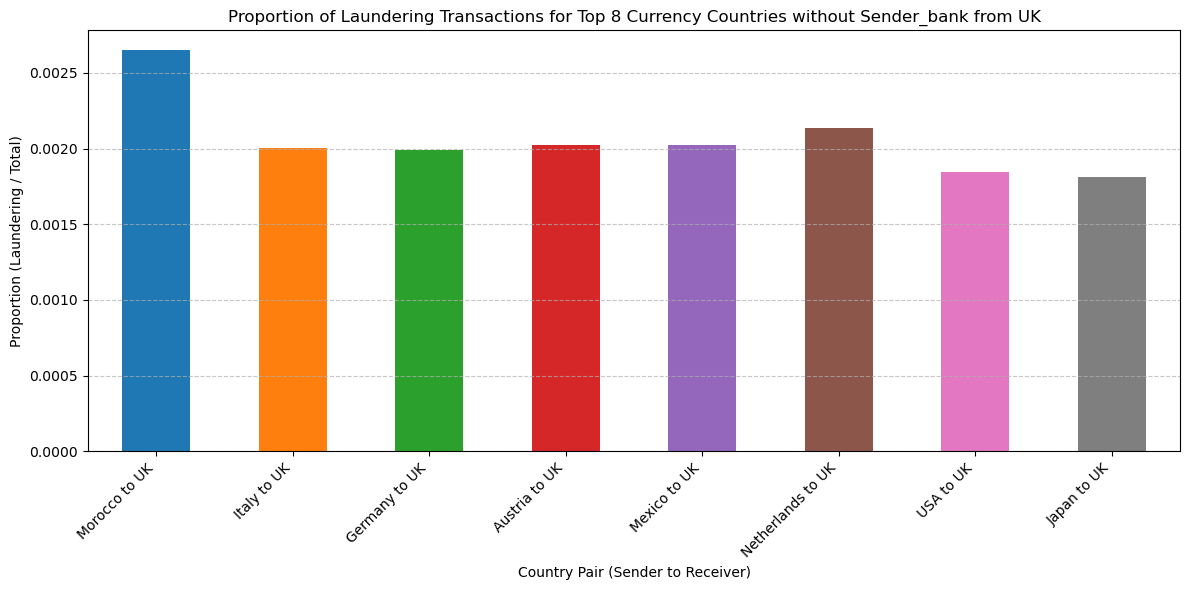

In [314]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['country_pair'] = df[df["Sender_bank_location"] != "UK"]['Sender_bank_location'] + ' to ' + df['Receiver_bank_location']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['country_pair'].value_counts()

# Calculate total counts for each currency pair (including is_laundering 0 and 1)
total_counts = df['country_pair'].value_counts()

# Select top 6 currency pairs based on laundering counts
top6_pairs = laundering_counts.head(8).index

# Filter counts and total counts for top 6 pairs
laundering_counts_top6 = laundering_counts[top6_pairs]
total_counts_top6 = total_counts[top6_pairs]

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts_top6 / total_counts_top6
proportions = proportions.fillna(0)  # Replace NaN with 0 for pairs with no laundering

# Create bar plot
plt.figure(figsize=(12, 6))
proportions.plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f']
)
plt.title('Proportion of Laundering Transactions for Top 8 Currency Countries without Sender_bank from UK')
plt.xlabel('Country Pair (Sender to Receiver)')
plt.ylabel('Proportion (Laundering / Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('top6_country_pairs_laundering_proportion.png')

# Show the plot
plt.show()

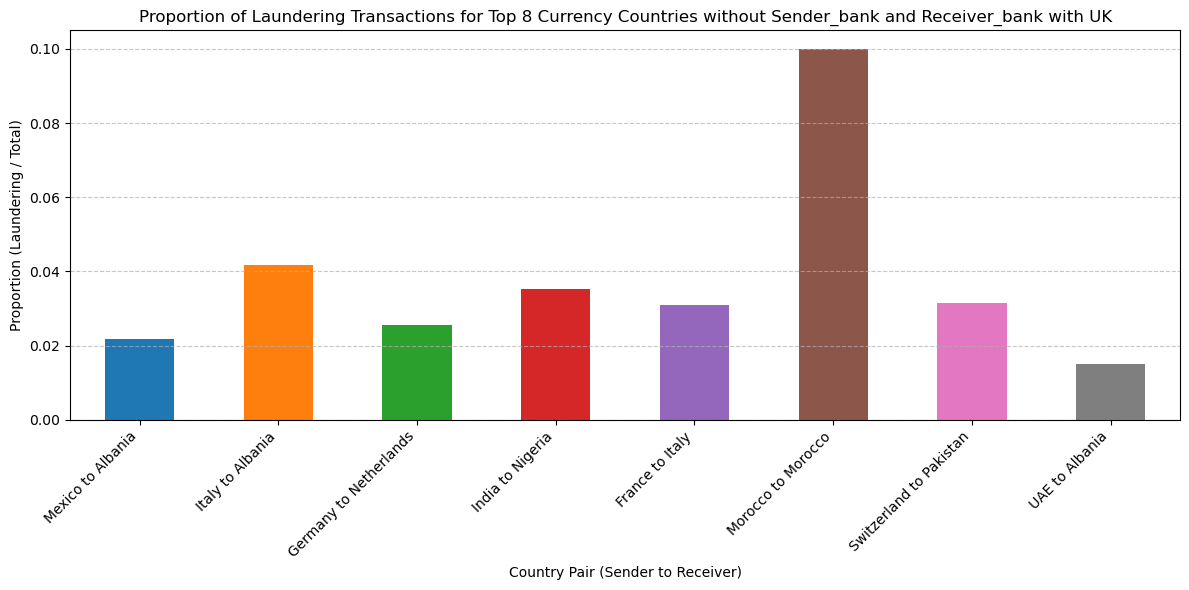

In [315]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['country_pair'] = df[df["Sender_bank_location"] != "UK"]['Sender_bank_location'] + ' to ' + df[df["Receiver_bank_location"] != "UK"]['Receiver_bank_location']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['country_pair'].value_counts()

# Calculate total counts for each currency pair (including is_laundering 0 and 1)
total_counts = df['country_pair'].value_counts()

# Select top 6 currency pairs based on laundering counts
top6_pairs = laundering_counts.head(8).index

# Filter counts and total counts for top 6 pairs
laundering_counts_top6 = laundering_counts[top6_pairs]
total_counts_top6 = total_counts[top6_pairs]

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts_top6 / total_counts_top6
proportions = proportions.fillna(0)  # Replace NaN with 0 for pairs with no laundering

# Create bar plot
plt.figure(figsize=(12, 6))
proportions.plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f']
)
plt.title('Proportion of Laundering Transactions for Top 8 Currency Countries without Sender_bank and Receiver_bank with UK')
plt.xlabel('Country Pair (Sender to Receiver)')
plt.ylabel('Proportion (Laundering / Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('top6_country_pairs_laundering_proportion.png')

# Show the plot
plt.show()

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Define AML-relevant group mappings
group_mapping = {
    'UK': 'UK',
    'Netherlands': 'High-Volume Economies',
    'Germany': 'High-Volume Economies',
    'France': 'High-Volume Economies',
    'Spain': 'High-Volume Economies',
    'Switzerland': 'High-Volume Economies',
    'Italy': 'High-Volume Economies',
    'Austria': 'High-Volume Economies',
    'UAE': 'UAE',
    'India': 'India',
    'Mexico': 'Mexico',
    'Morocco': 'Morocco',
    'Japan': 'Japan',
    'Nigeria': 'Nigeria',
    'Pakistan': 'Pakistan',
    'USA': 'USA',
    'Albania': 'Albania',
    'Turkey': 'Turkey',
}

# Apply group mapping to create a new column
df['Sender_bank_location_group'] = df['Sender_bank_location'].map(group_mapping)
df['Receiver_bank_location_group'] = df['Receiver_bank_location'].map(group_mapping)
filtered_df['Sender_bank_location_group'] = filtered_df['Sender_bank_location'].map(group_mapping)
filtered_df['Receiver_bank_location_group'] = filtered_df['Receiver_bank_location'].map(group_mapping)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34096\2026624191.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sender_bank_location_group'] = filtered_df['Sender_bank_location'].map(group_mapping)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34096\2026624191.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Receiver_bank_location_group'] = filtered_df['Receiver_bank_location'].map(group_mapping)


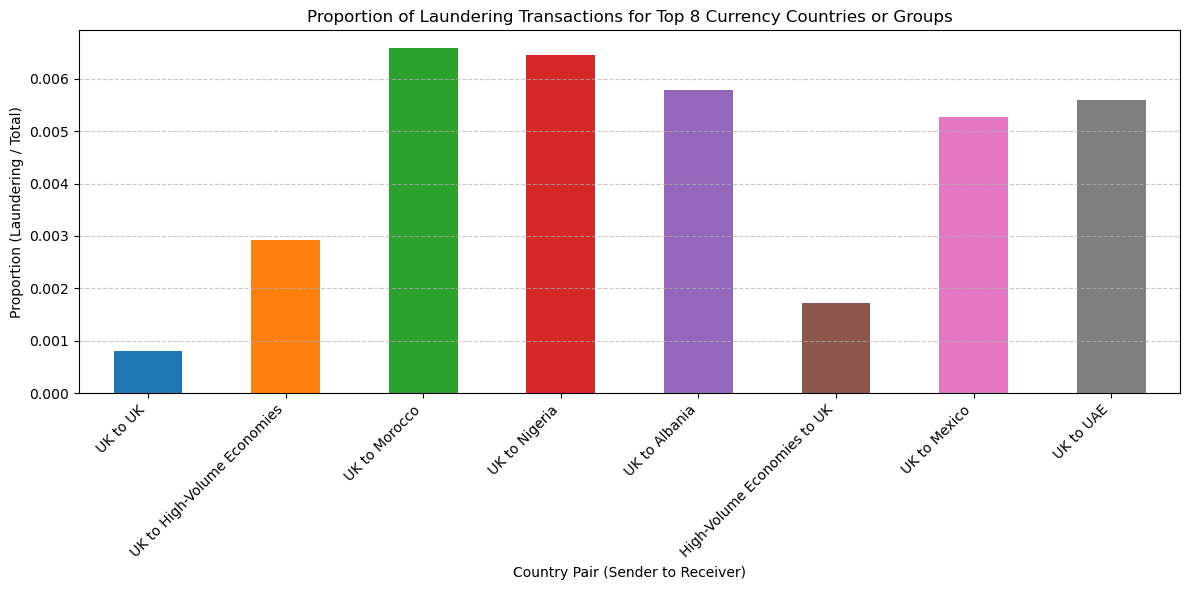

In [316]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['country_pair'] = df['Sender_bank_location_group'] + ' to ' + df['Receiver_bank_location_group']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['country_pair'].value_counts()

# Calculate total counts for each currency pair (including is_laundering 0 and 1)
total_counts = df['country_pair'].value_counts()

# Select top 6 currency pairs based on laundering counts
top6_pairs = laundering_counts.head(8).index

# Filter counts and total counts for top 6 pairs
laundering_counts_top6 = laundering_counts[top6_pairs]
total_counts_top6 = total_counts[top6_pairs]

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts_top6 / total_counts_top6
proportions = proportions.fillna(0)  # Replace NaN with 0 for pairs with no laundering

# Create bar plot
plt.figure(figsize=(12, 6))
proportions.plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f']
)
plt.title('Proportion of Laundering Transactions for Top 8 Currency Countries or Groups')
plt.xlabel('Country Pair (Sender to Receiver)')
plt.ylabel('Proportion (Laundering / Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('top6_country_pairs_laundering_proportion.png')

# Show the plot
plt.show()

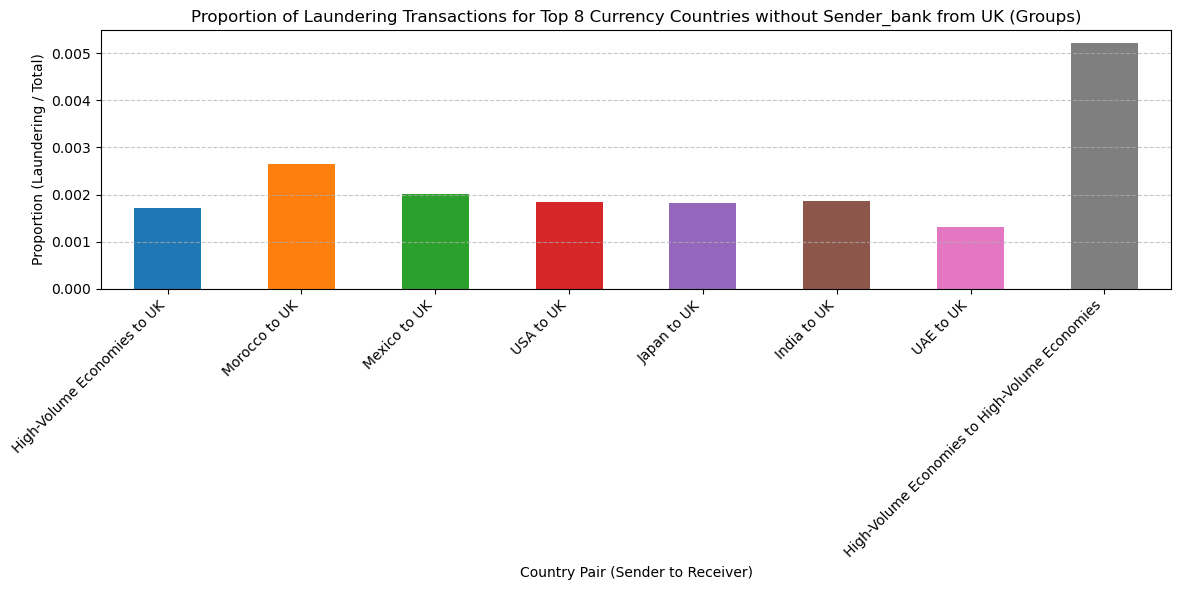

In [317]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['country_pair'] = df[df["Sender_bank_location_group"] != "UK"]['Sender_bank_location_group'] + ' to ' + df['Receiver_bank_location_group']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['country_pair'].value_counts()

# Calculate total counts for each currency pair (including is_laundering 0 and 1)
total_counts = df['country_pair'].value_counts()

# Select top 6 currency pairs based on laundering counts
top6_pairs = laundering_counts.head(8).index

# Filter counts and total counts for top 6 pairs
laundering_counts_top6 = laundering_counts[top6_pairs]
total_counts_top6 = total_counts[top6_pairs]

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts_top6 / total_counts_top6
proportions = proportions.fillna(0)  # Replace NaN with 0 for pairs with no laundering

# Create bar plot
plt.figure(figsize=(12, 6))
proportions.plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f']
)
plt.title('Proportion of Laundering Transactions for Top 8 Currency Countries without Sender_bank from UK (Groups)')
plt.xlabel('Country Pair (Sender to Receiver)')
plt.ylabel('Proportion (Laundering / Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

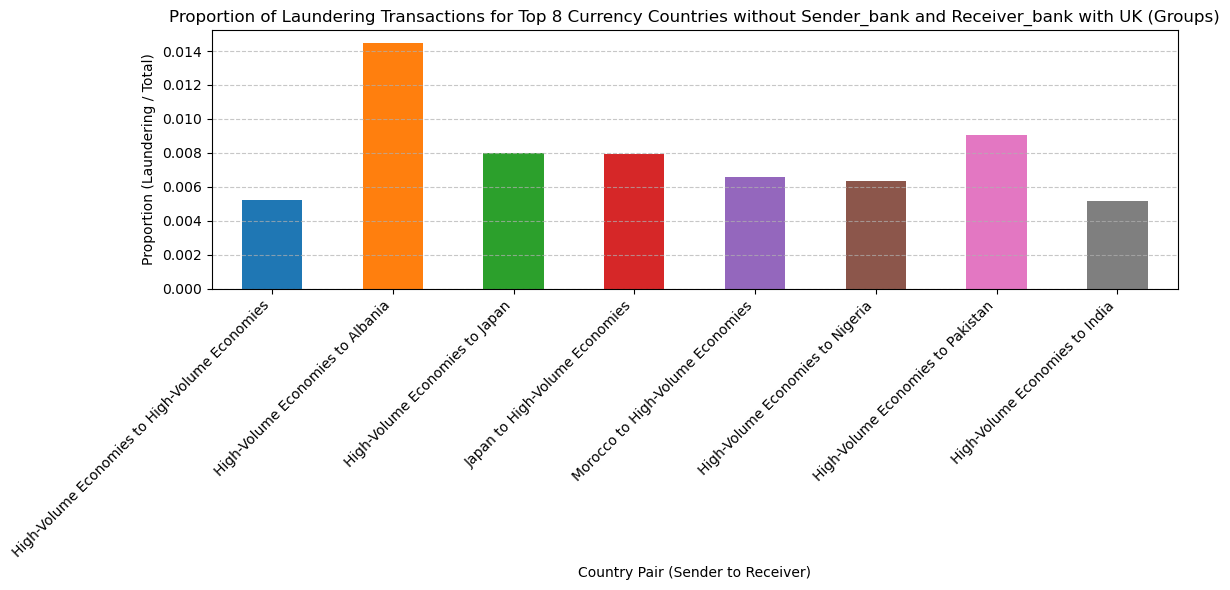

In [318]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a column for Payment_currency to Received_currency pair
df['country_pair'] = df[df["Sender_bank_location_group"] != "UK"]['Sender_bank_location_group'] + ' to ' + df[df["Receiver_bank_location_group"] != "UK"]['Receiver_bank_location_group']

# Calculate counts for is_laundering == 1 by currency pair
laundering_counts = df[df['Is_laundering'] == 1]['country_pair'].value_counts()

# Calculate total counts for each currency pair (including is_laundering 0 and 1)
total_counts = df['country_pair'].value_counts()

# Select top 6 currency pairs based on laundering counts
top6_pairs = laundering_counts.head(8).index

# Filter counts and total counts for top 6 pairs
laundering_counts_top6 = laundering_counts[top6_pairs]
total_counts_top6 = total_counts[top6_pairs]

# Calculate proportions (laundering counts / total counts)
proportions = laundering_counts_top6 / total_counts_top6
proportions = proportions.fillna(0)  # Replace NaN with 0 for pairs with no laundering

# Create bar plot
plt.figure(figsize=(12, 6))
proportions.plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f']
)
plt.title('Proportion of Laundering Transactions for Top 8 Currency Countries without Sender_bank and Receiver_bank with UK (Groups)')
plt.xlabel('Country Pair (Sender to Receiver)')
plt.ylabel('Proportion (Laundering / Total)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot (optional)
plt.savefig('top6_country_pairs_laundering_proportion.png')

# Show the plot
plt.show()

In [175]:
df

Time        Date  Sender_account  Receiver_account   Amount  \
0        10:35:19  2022-10-07      8724731955        2769355426  1459.15   
1        10:35:20  2022-10-07      1491989064        8401255335  6019.64   
2        10:35:20  2022-10-07       287305149        4404767002 14328.44   
3        10:35:21  2022-10-07      5376652437        9600420220 11895.00   
4        10:35:21  2022-10-07      9614186178        3803336972   115.25   
...           ...         ...             ...               ...      ...   
9504847  10:57:01  2023-08-23      2453933570         519744068  2247.25   
9504848  10:57:06  2023-08-23      9805510177        5416607878   927.18   
9504849  10:57:06  2023-08-23      7282330957        2995527149  1455.14   
9504850  10:57:11  2023-08-23       940337377        4812815165 25995.70   
9504851  10:57:12  2023-08-23       105185176        6824994831  9586.08   

        Payment_currency Received_currency Sender_bank_location  \
0              UK pounds         UK pounds                   UK   
1              UK pounds            Dirham                   UK   
2              UK pounds         UK pounds                   UK   
3              UK pounds         UK pounds                   UK   
4              UK pounds         UK pounds                   UK   
...                  ...               ...                  ...   
9504847        UK pounds         UK pounds                   UK   
9504848        UK pounds         UK pounds                   UK   
9504849        UK pounds         UK pounds                   UK   
9504850        UK pounds         UK pounds                   UK   
9504851        UK pounds         UK pounds                   UK   

        Receiver_bank_location  Payment_type Is_laundering  \
0                           UK  Cash Deposit             0   
1                          UAE  Cross-border             0   
2                           UK        Cheque             0   
3                           UK           ACH             0   
4                           UK  Cash Deposit             0   
...                        ...           ...           ...   
9504847                     UK           ACH             0   
9504848                     UK    Debit card             0   
9504849                     UK           ACH             0   
9504850                     UK           ACH             0   
9504851                     UK           ACH             0   

              Laundering_type           currency_pair country_pair  \
0        Normal_Cash_Deposits  UK pounds to UK pounds     UK to UK   
1              Normal_Fan_Out     UK pounds to Dirham    UK to UAE   
2        Normal_Small_Fan_Out  UK pounds to UK pounds     UK to UK   
3               Normal_Fan_In  UK pounds to UK pounds     UK to UK   
4        Normal_Cash_Deposits  UK pounds to UK pounds     UK to UK   
...                       ...                     ...          ...   
9504847  Normal_Small_Fan_Out  UK pounds to UK pounds     UK to UK   
9504848  Normal_Small_Fan_Out  UK pounds to UK pounds     UK to UK   
9504849  Normal_Small_Fan_Out  UK pounds to UK pounds     UK to UK   
9504850         Normal_Fan_In  UK pounds to UK pounds     UK to UK   
9504851        Normal_Fan_Out  UK pounds to UK pounds     UK to UK   

        Sender_bank_location_group Receiver_bank_location_group  
0                               UK                           UK  
1                               UK                          UAE  
2                               UK                           UK  
3                               UK                           UK  
4                               UK                           UK  
...                            ...                          ...  
9504847                         UK                           UK  
9504848                         UK                           UK  
9504849                         UK                           UK  
9504850                         UK               

<Axes: title={'center': 'Top Laundering Types for Laundering'}, ylabel='Laundering_type'>

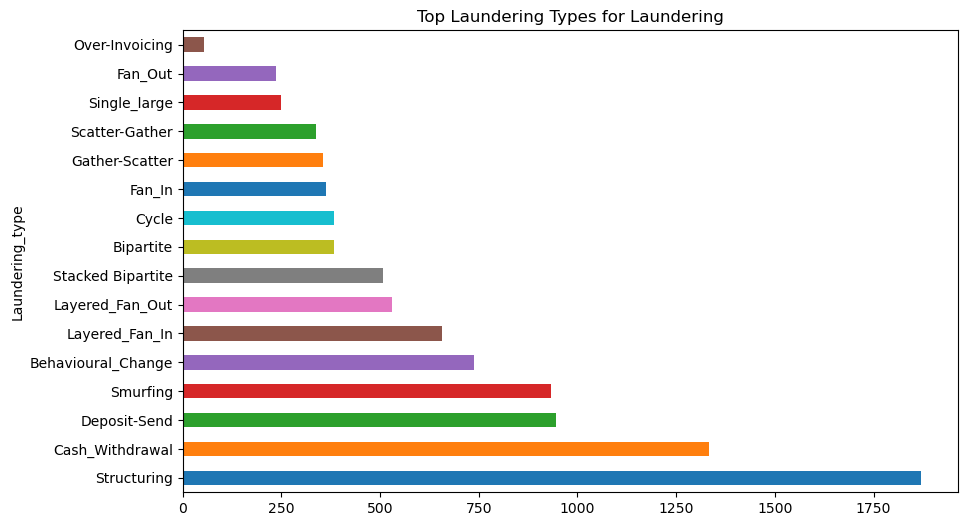

In [319]:
df[df["Is_laundering"] == 1]["Laundering_type"].value_counts().plot(
    kind="barh", 
    figsize=(10, 6), 
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], 
    title="Top Laundering Types for Laundering"
)

In [195]:
df['Laundering_type'] = df['Laundering_type'].replace(['Behavioural_Change_1', 'Behavioural_Change_2'], 'Behavioural_Change')

Analyzing top 6 currency pairs...
Error processing currency pairs: index 6 is out of bounds for axis 0 with size 6
Analyzing top 6 country pairs...
Error processing country pairs: index 6 is out of bounds for axis 0 with size 6
Analyzing top 6 sender bank location groups...
Error processing sender bank location groups: index 6 is out of bounds for axis 0 with size 6
Analyzing top 6 receiver bank location groups...
Error processing receiver bank location groups: index 6 is out of bounds for axis 0 with size 6


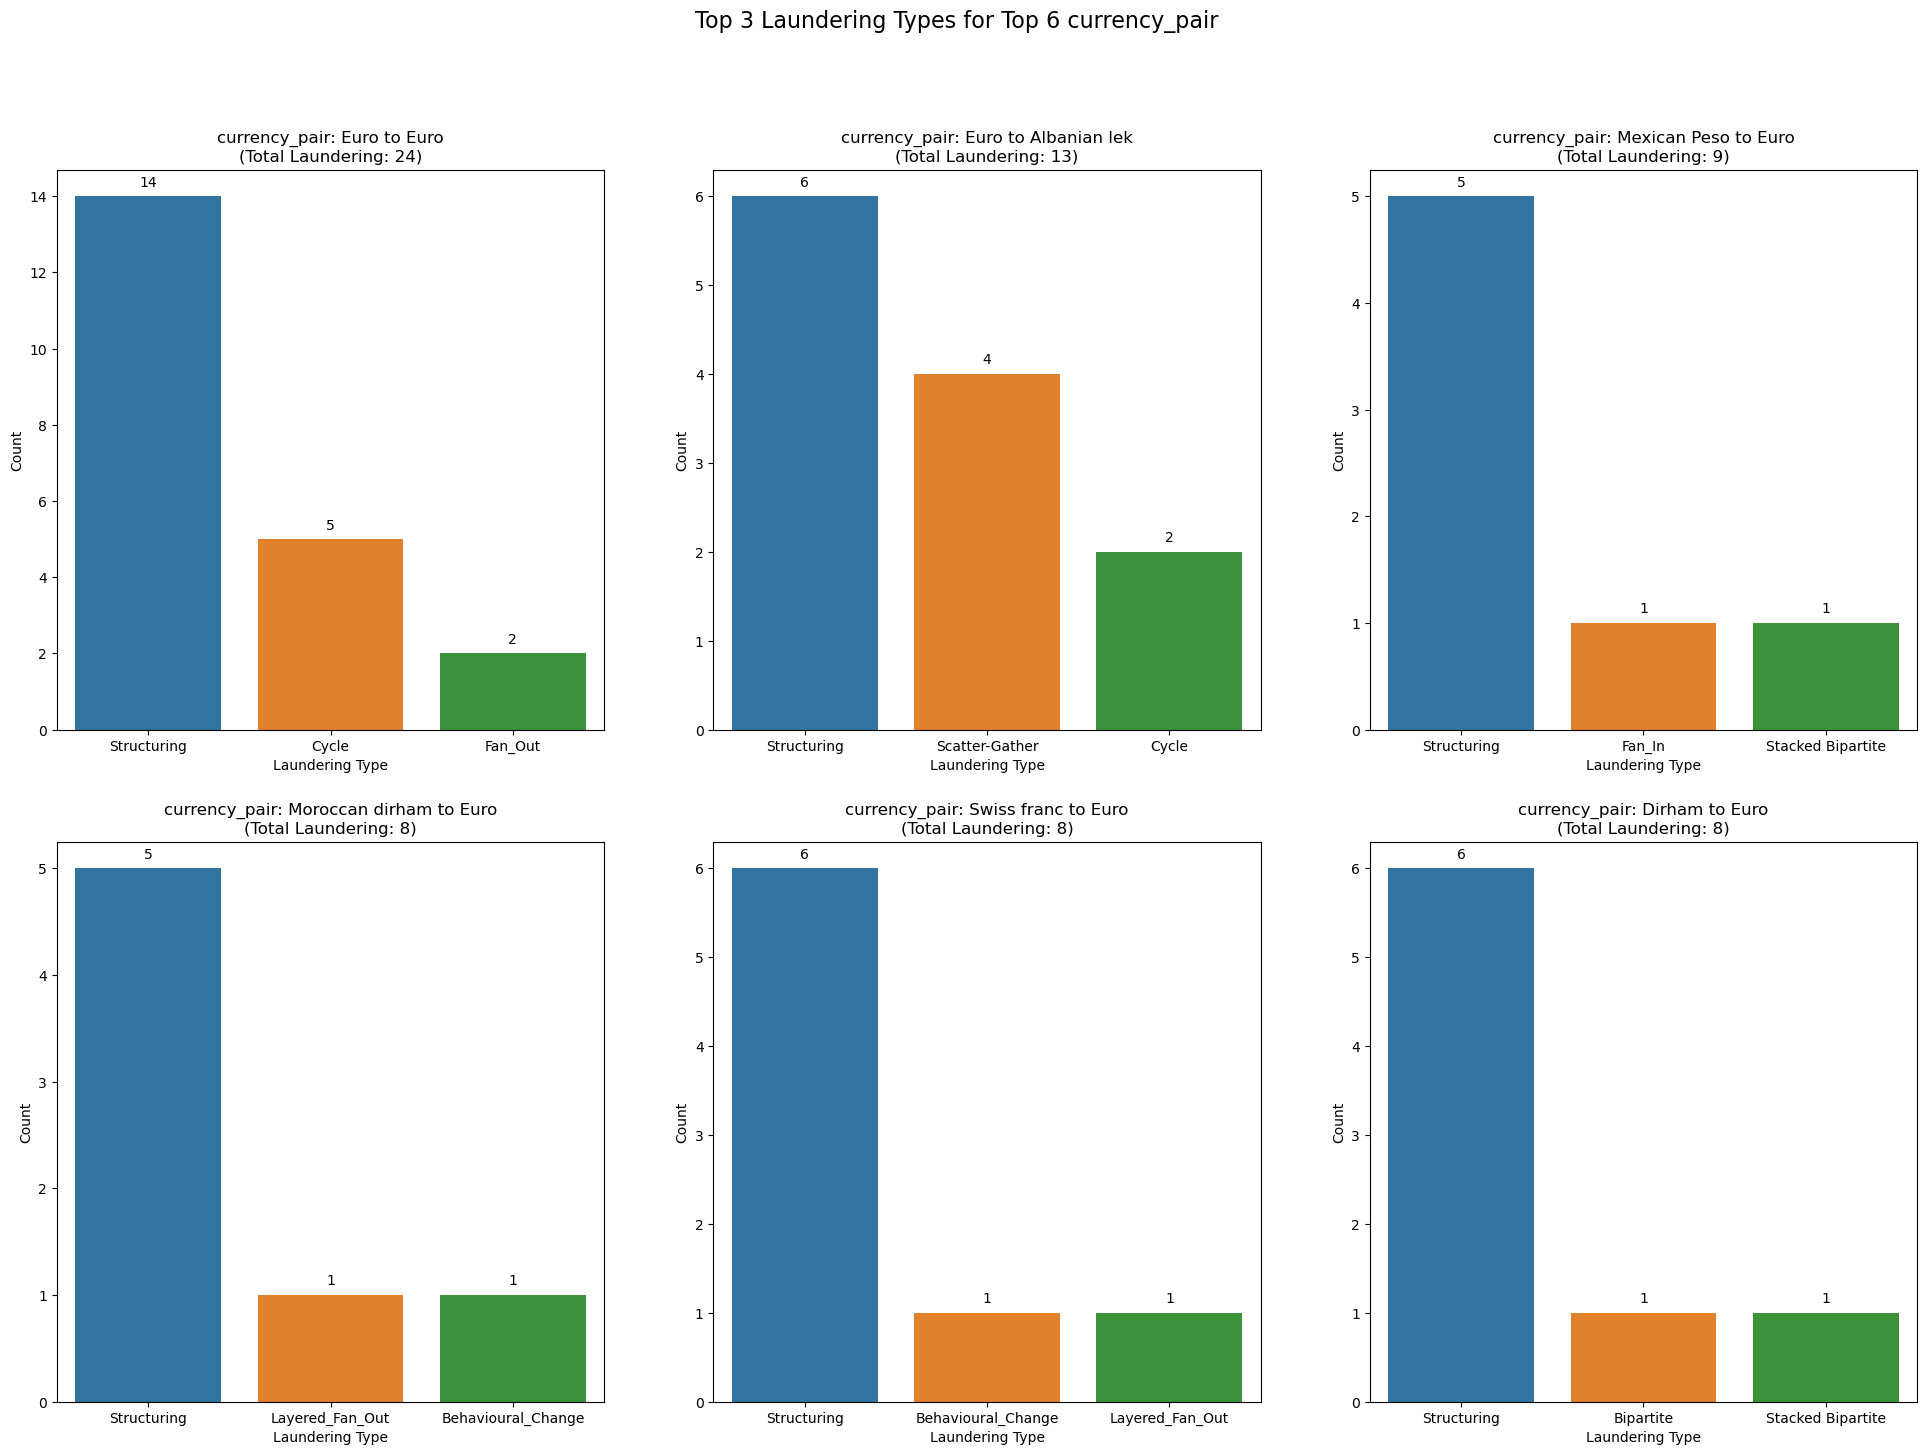

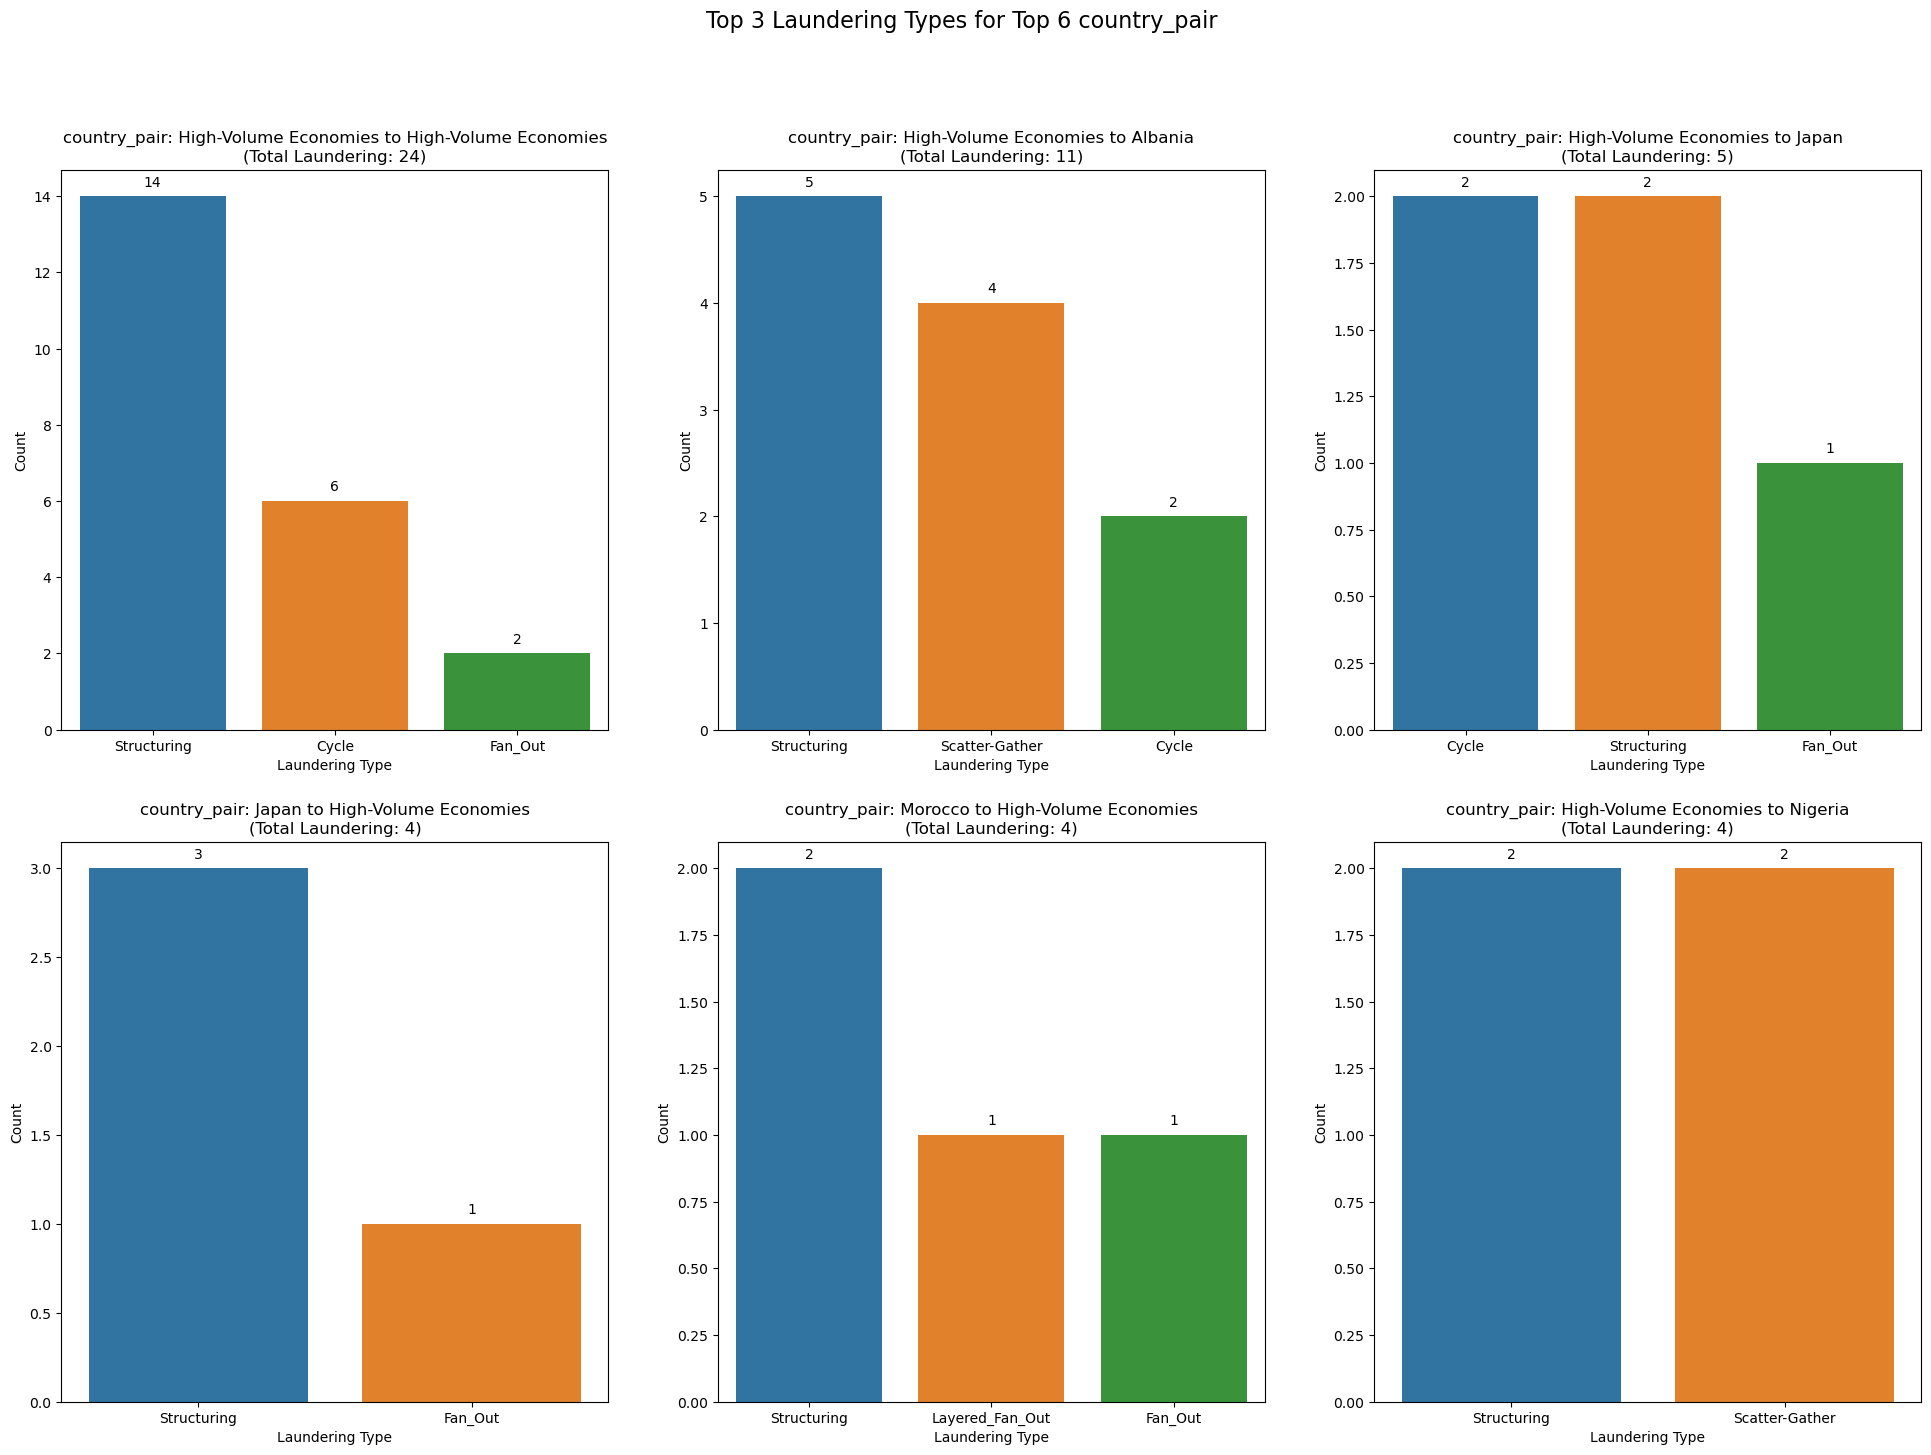

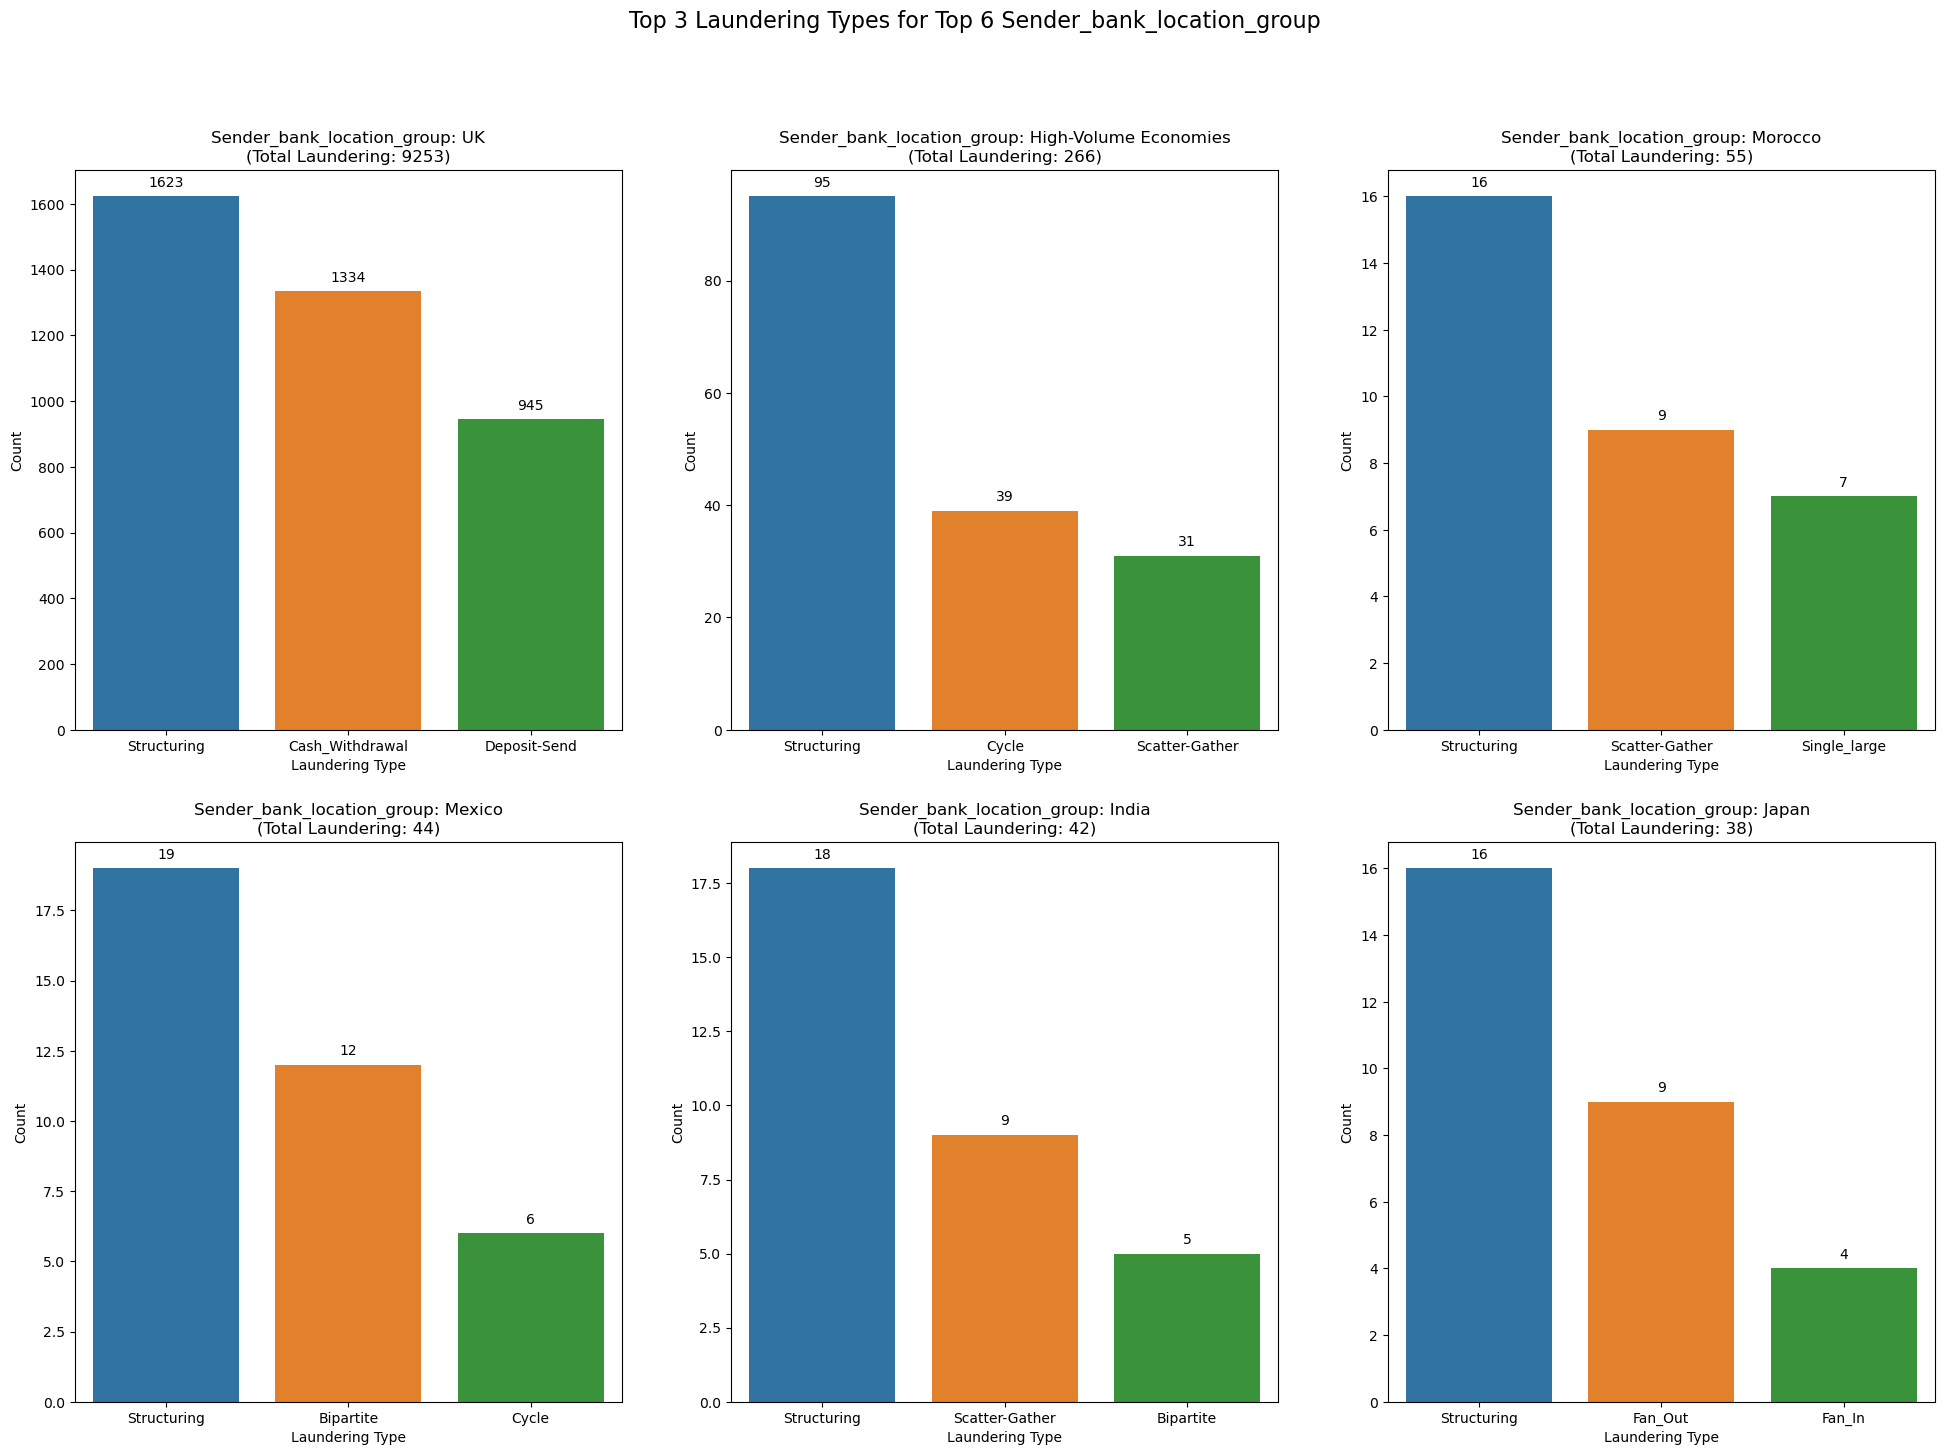

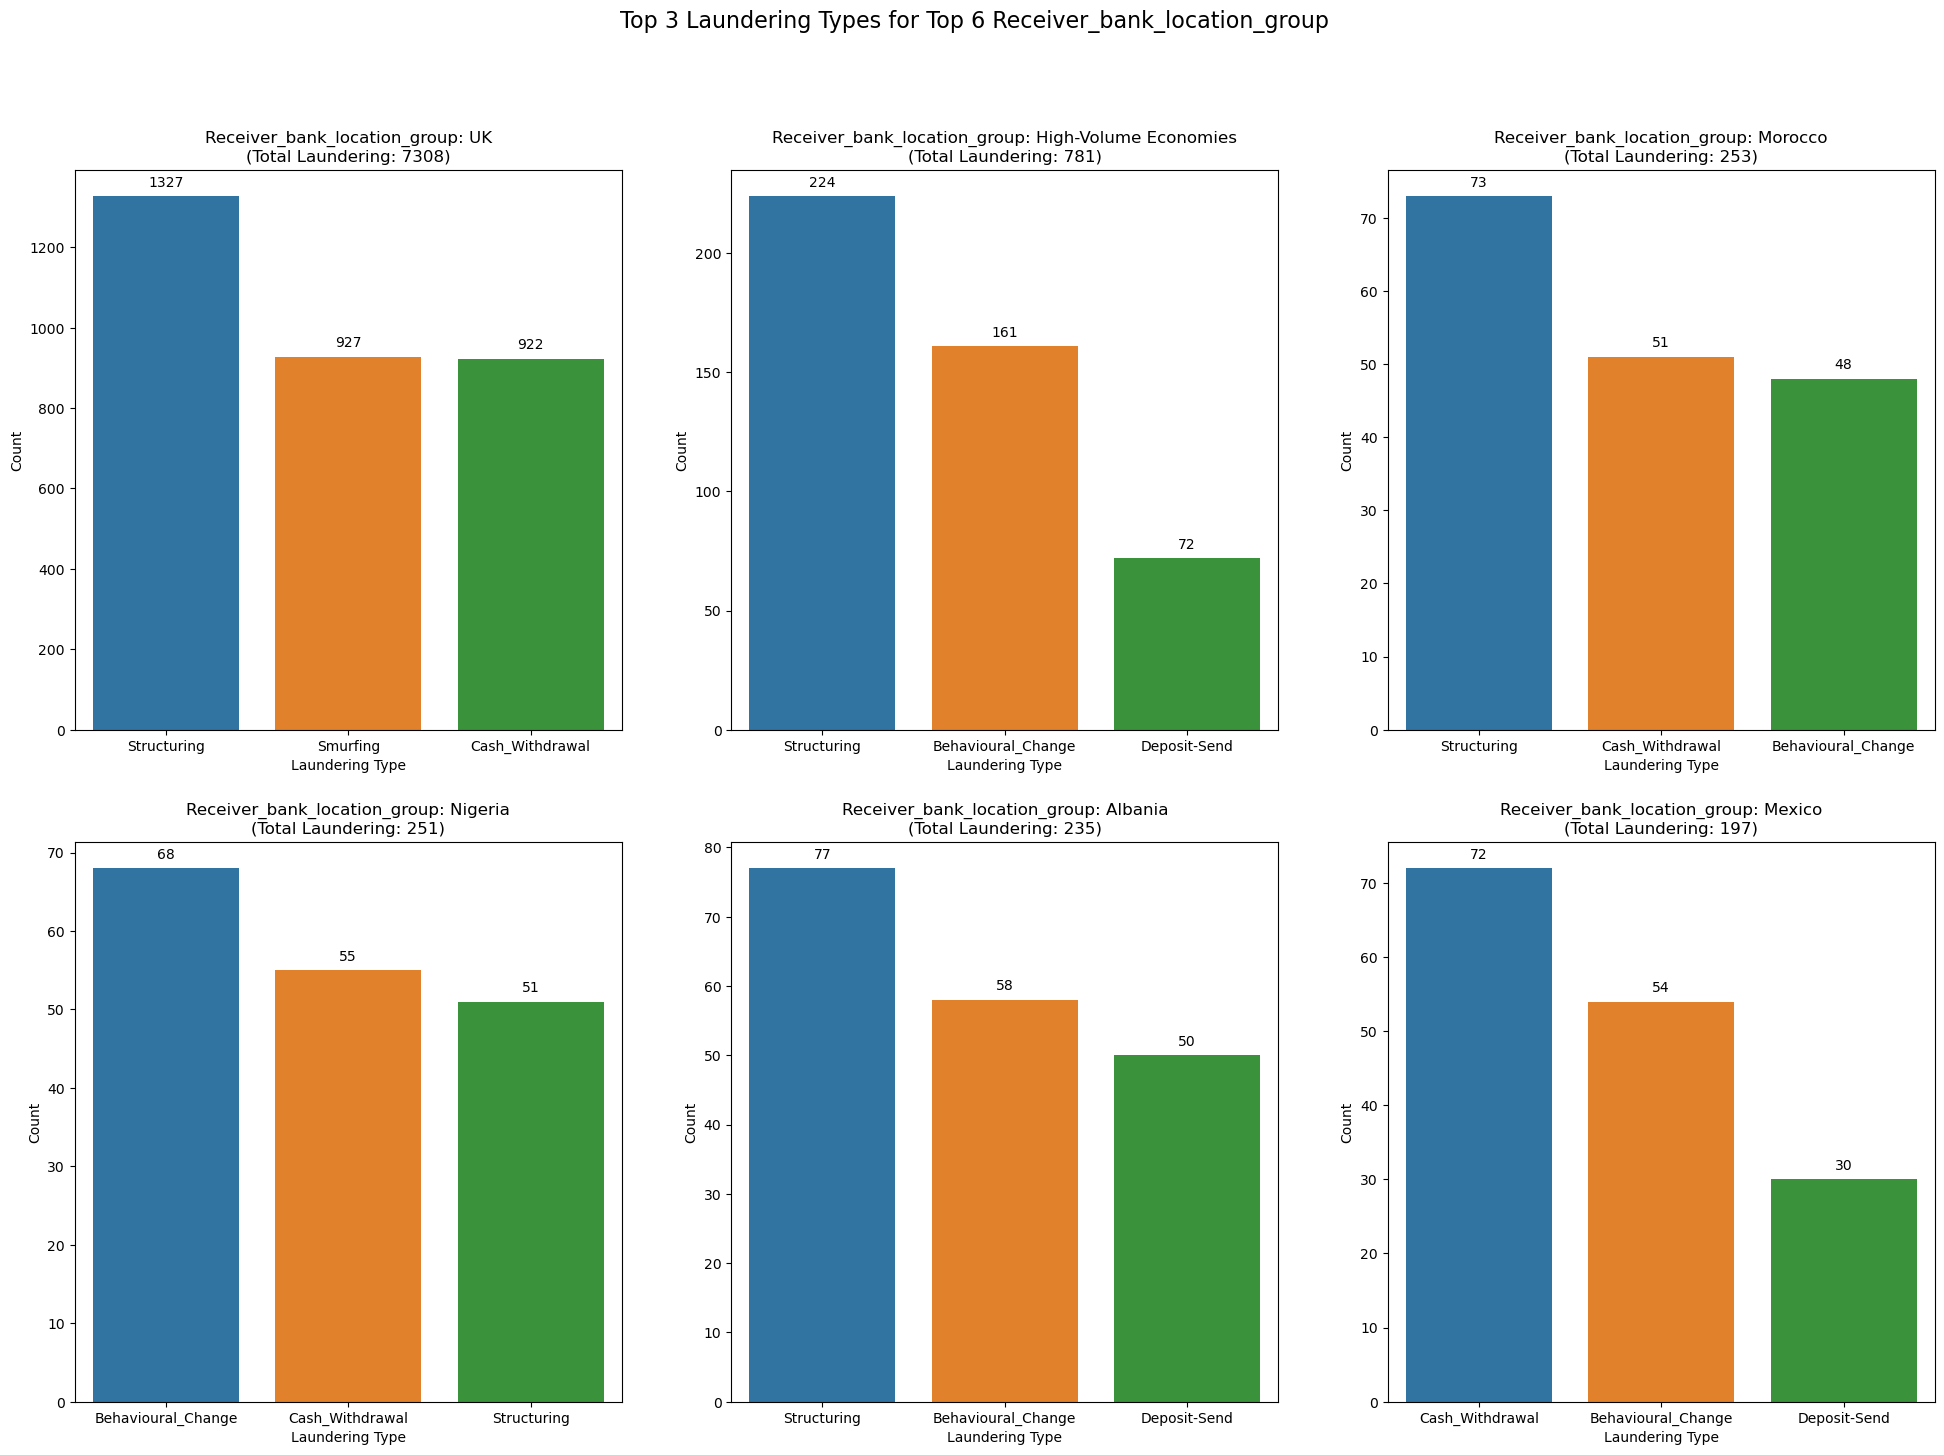

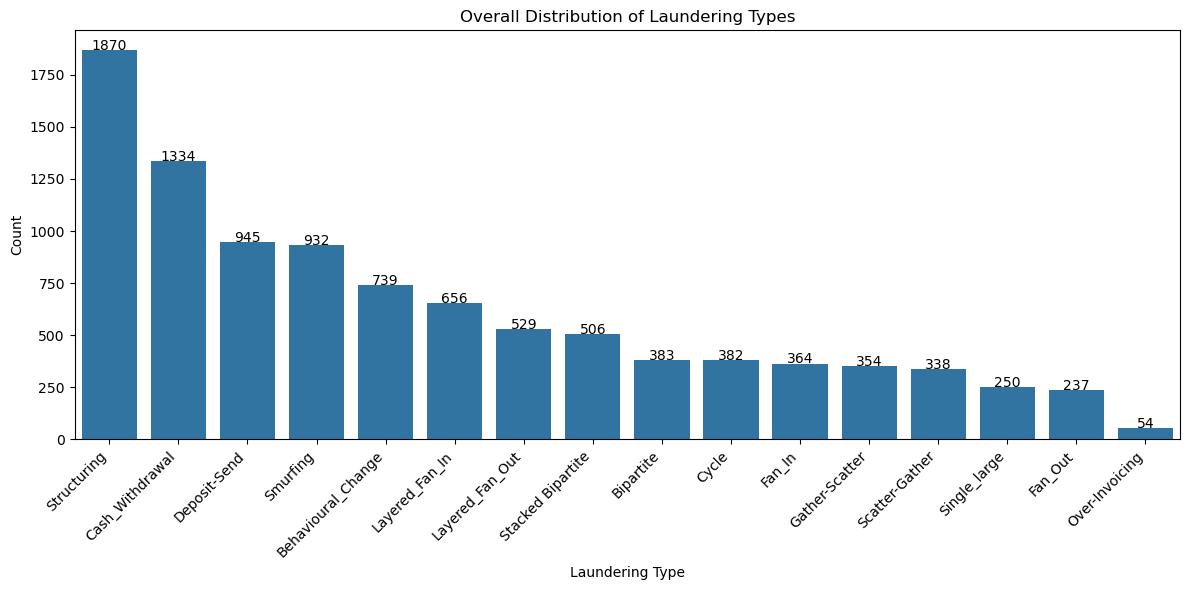

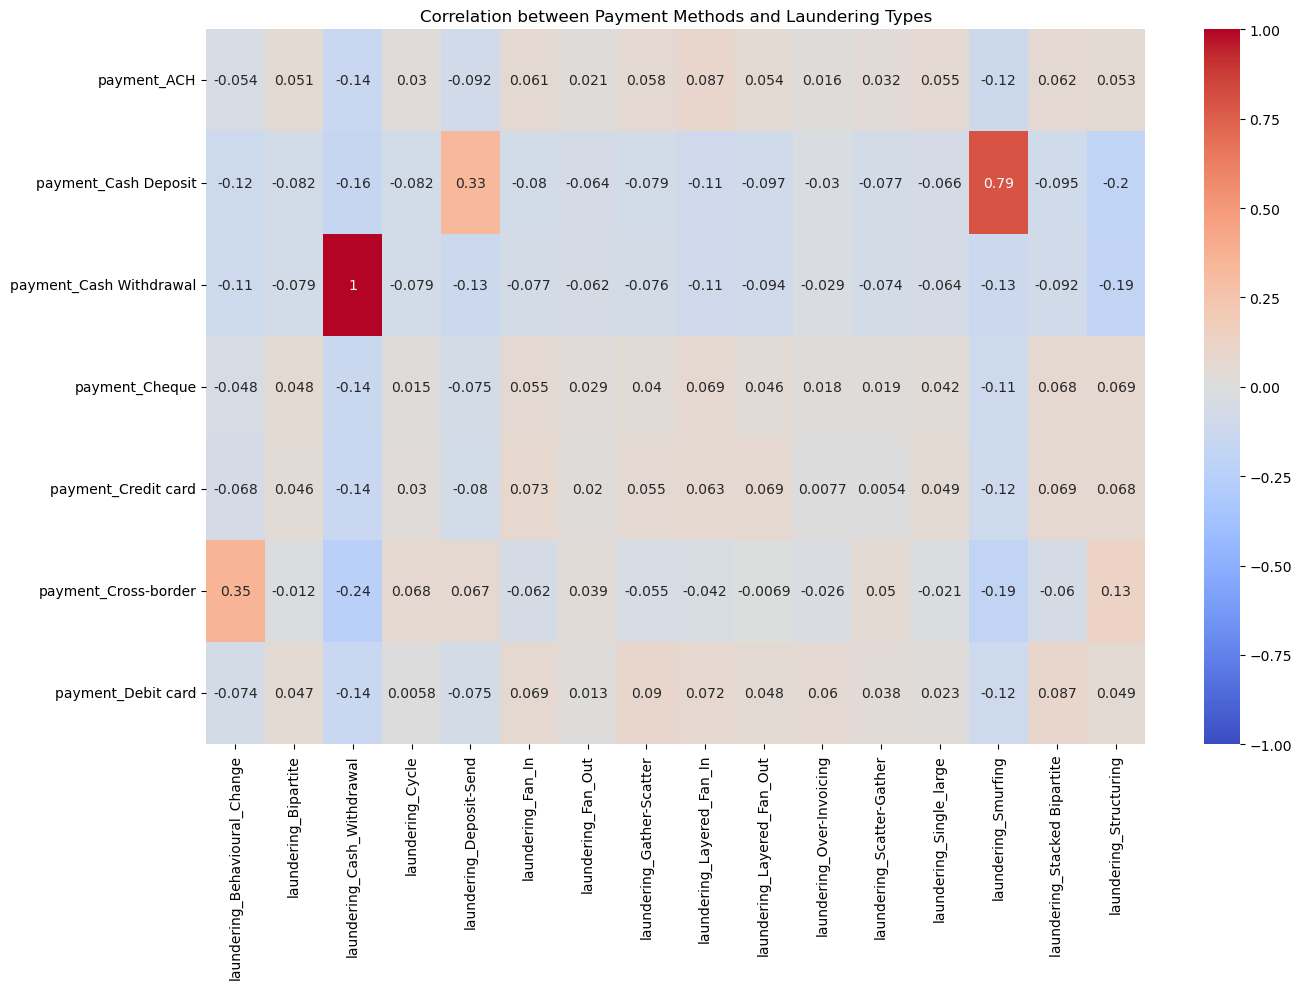

Analysis complete! All visualizations have been saved.


In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming your dataframe is named df and is already loaded
# If you need to import your data, uncomment and modify the following line:
# df = pd.read_csv('your_data_file.csv')

# Create pair columns if they don't exist
if 'currency_pair' not in df.columns:
    df['currency_pair'] = df['Payment_currency'] + ' to ' + df['Received_currency']

if 'country_pair' not in df.columns:
    df['country_pair'] = df['Sender_bank_location'] + ' to ' + df['Receiver_bank_location']

# Filter to only include laundering cases
laundering_df = df[df['Is_laundering'] == 1].copy()

# Function to plot top laundering types for top 6 pairs
def plot_top_laundering_types_for_top6_pairs(pair_column):
    # Get the top 6 pairs based on laundering counts
    top6_pairs = laundering_df[pair_column].value_counts().head(8).index
    
    # Filter data to include only those top 6 pairs
    filtered_data = laundering_df[laundering_df[pair_column].isin(top6_pairs)]
    
    # Create a figure with 2x3 subplots (6 total)
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    fig.suptitle(f'Top 3 Laundering Types for Top 6 {pair_column}', fontsize=16)
    
    # Flatten axes for easier indexing
    axes = axes.flatten()
    
    # Define a palette for top 3 laundering types (3 colors)
    top3_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
    
    # Plot for each of the top 6 pairs
    for i, pair in enumerate(top6_pairs):
        # Filter data for this pair
        pair_data = filtered_data[filtered_data[pair_column] == pair]
        
        # Get top 3 laundering types for this pair
        top3_types = pair_data['Laundering_type'].value_counts().head(3)
        
        # Create bar plot
        ax = axes[i]
        sns.barplot(x=top3_types.index, y=top3_types.values, ax=ax, palette=top3_palette)
        
        # Add count labels on top of bars
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        xytext=(0, 5), textcoords='offset points')
        
        # Set titles and labels
        total_count = pair_data.shape[0]
        ax.set_title(f'{pair_column}: {pair}\n(Total Laundering: {total_count})')
        ax.set_xlabel('Laundering Type')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=0)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
    plt.savefig(f'top3_laundering_types_for_top6_{pair_column}.png')
    plt.show()
    
    # Summary plot showing the distribution of these top 6 pairs
    plt.figure(figsize=(12, 6))
    summary_counts = laundering_df[pair_column].value_counts().head(8)
    # Define a palette for top 8 pairs
    top8_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                    '#8c564b', '#e377c2', '#7f7f7f']
    sns.barplot(x=summary_counts.index, y=summary_counts.values, palette=top8_palette)
    plt.title(f'Distribution of Top 6 {pair_column} in Laundering Transactions')
    plt.xlabel(pair_column)
    plt.ylabel('Count')
    plt.xticks(rotation=0, ha='right')
    plt.tight_layout()
    plt.savefig(f'top6_{pair_column}_distribution.png')
    plt.show()

# Create a heatmap for top 6 pairs vs laundering types
def create_heatmap_for_top6_pairs(pair_column):
    # Get the top 6 pairs
    top6_pairs = laundering_df[pair_column].value_counts().head(8).index
    
    # Filter data for these pairs
    filtered_data = laundering_df[laundering_df[pair_column].isin(top6_pairs)]
    
    # Create crosstab - include all laundering types that appear in the data
    heatmap_data = pd.crosstab(
        filtered_data[pair_column], 
        filtered_data['Laundering_type']
    )
    
    # Create heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
    plt.title(f'Heatmap of Laundering Types vs Top 6 {pair_column}')
    plt.ylabel(pair_column)
    plt.xlabel('Laundering Type')
    plt.tight_layout()
    plt.savefig(f'laundering_types_vs_top6_{pair_column}_heatmap.png')
    plt.show()

# Function to create pie charts showing proportion of laundering types for each pair
def create_pie_charts_for_top6_pairs(pair_column):
    # Get the top 6 pairs
    top6_pairs = laundering_df[pair_column].value_counts().head(8).index
    
    # Create a 2x3 grid of pie charts
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Distribution of Laundering Types for Top 6 {pair_column}', fontsize=16)
    
    # Flatten axes for easier indexing
    axes = axes.flatten()
    
    # Create a pie chart for each pair
    for i, pair in enumerate(top6_pairs):
        # Filter data for this pair
        pair_data = laundering_df[laundering_df[pair_column] == pair]
        
        # Count laundering types
        type_counts = pair_data['Laundering_type'].value_counts()
        
        # Create pie chart
        ax = axes[i]
        wedges, texts, autotexts = ax.pie(
            type_counts.values, 
            labels=type_counts.index, 
            autopct='%1.1f%%',
            textprops={'fontsize': 8}
        )
        
        # Make the percentage labels more readable
        for autotext in autotexts:
            autotext.set_fontsize(8)
            autotext.set_weight('bold')
        
        ax.set_title(f'{pair_column}: {pair}\n(Total: {pair_data.shape[0]})')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
    plt.savefig(f'laundering_types_pie_charts_for_top6_{pair_column}.png')
    plt.show()

# --- Analysis for top 6 currency pairs ---
print("Analyzing top 6 currency pairs...")
try:
    plot_top_laundering_types_for_top6_pairs('currency_pair')
    create_heatmap_for_top6_pairs('currency_pair')
    create_pie_charts_for_top6_pairs('currency_pair')
except Exception as e:
    print(f"Error processing currency pairs: {e}")

# --- Analysis for top 6 country pairs ---
print("Analyzing top 6 country pairs...")
try:
    plot_top_laundering_types_for_top6_pairs('country_pair')  
    create_heatmap_for_top6_pairs('country_pair')
    create_pie_charts_for_top6_pairs('country_pair')
except Exception as e:
    print(f"Error processing country pairs: {e}")

# --- Analysis for sender bank location groups ---
if 'Sender_bank_location_group' in df.columns:
    print("Analyzing top 6 sender bank location groups...")
    try:
        plot_top_laundering_types_for_top6_pairs('Sender_bank_location_group')
        create_heatmap_for_top6_pairs('Sender_bank_location_group')
    except Exception as e:
        print(f"Error processing sender bank location groups: {e}")

# --- Analysis for receiver bank location groups ---
if 'Receiver_bank_location_group' in df.columns:
    print("Analyzing top 6 receiver bank location groups...")
    try:
        plot_top_laundering_types_for_top6_pairs('Receiver_bank_location_group')
        create_heatmap_for_top6_pairs('Receiver_bank_location_group')
    except Exception as e:
        print(f"Error processing receiver bank location groups: {e}")

# --- Overall analysis of laundering types ---
# Create a summary plot showing overall distribution of laundering types
plt.figure(figsize=(12, 6))
laundering_counts = laundering_df['Laundering_type'].value_counts().sort_values(ascending=False)
sns.barplot(x=laundering_counts.index, y=laundering_counts.values)
plt.title('Overall Distribution of Laundering Types')
plt.xlabel('Laundering Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(laundering_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center')
plt.tight_layout()
plt.savefig('overall_laundering_types.png')
plt.show()



# --- Additional analysis: Correlation between payment methods and laundering types ---
# Create a correlation matrix between payment methods and laundering types
# First create dummy variables for categorical features
payment_dummies = pd.get_dummies(laundering_df['Payment_type'], prefix='payment')
laundering_dummies = pd.get_dummies(laundering_df['Laundering_type'], prefix='laundering')

# Combine the dummy variables
combined_dummies = pd.concat([payment_dummies, laundering_dummies], axis=1)

# Calculate correlation matrix
corr_matrix = combined_dummies.corr()

# Create a heatmap of the correlation matrix (focusing on payment-laundering correlations)
payment_cols = [col for col in corr_matrix.columns if col.startswith('payment')]
laundering_cols = [col for col in corr_matrix.columns if col.startswith('laundering')]

# Extract the correlation between payment methods and laundering types
payment_laundering_corr = corr_matrix.loc[payment_cols, laundering_cols]

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(payment_laundering_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Payment Methods and Laundering Types')
plt.tight_layout()
plt.savefig('payment_laundering_correlation.png')
plt.show()

print("Analysis complete! All visualizations have been saved.")

<Figure size 1000x600 with 0 Axes>

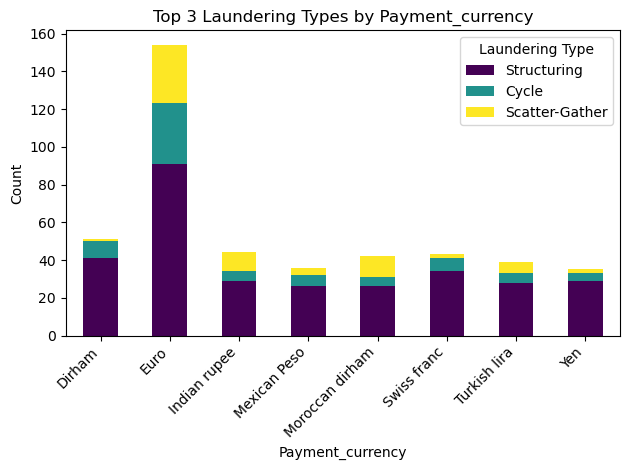

<Figure size 1000x600 with 0 Axes>

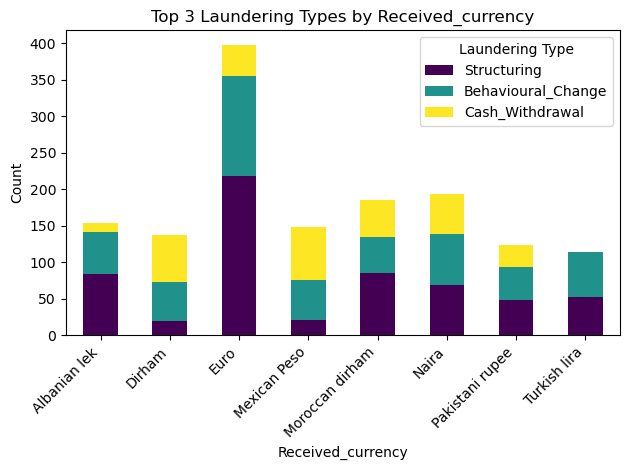

<Figure size 1000x600 with 0 Axes>

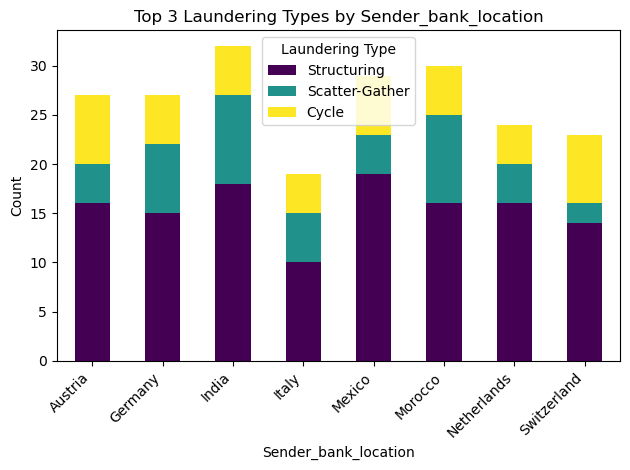

<Figure size 1000x600 with 0 Axes>

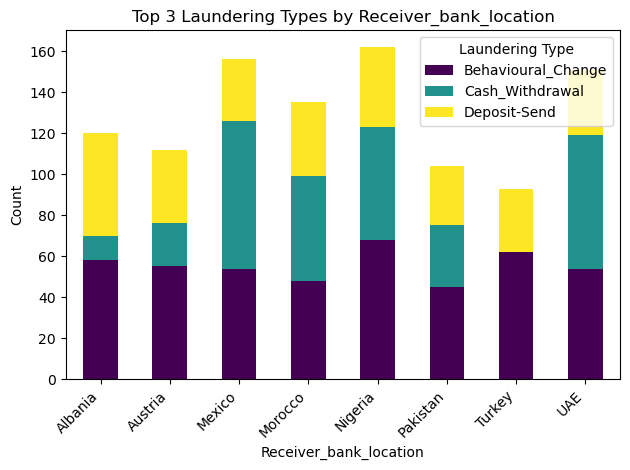

<Figure size 1000x600 with 0 Axes>

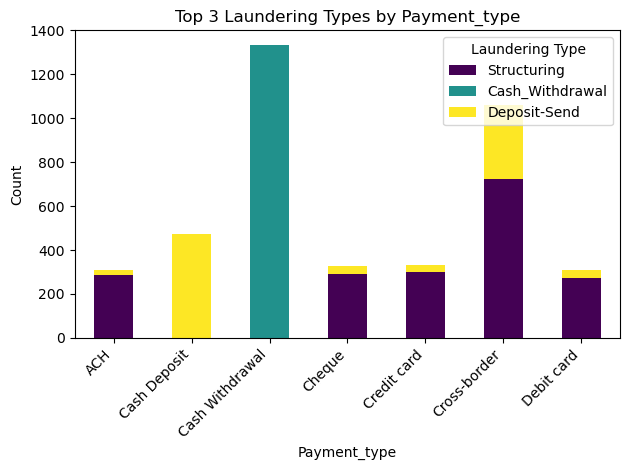

<Figure size 1000x600 with 0 Axes>

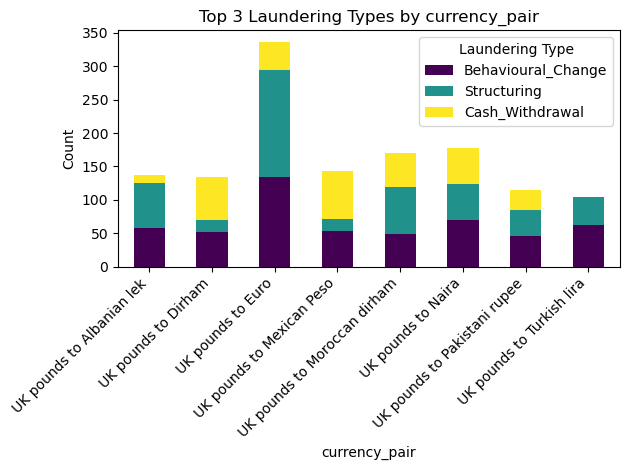

<Figure size 1000x600 with 0 Axes>

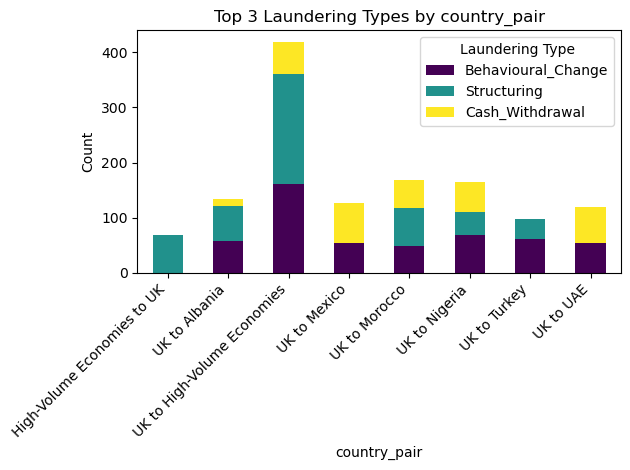

<Figure size 1000x600 with 0 Axes>

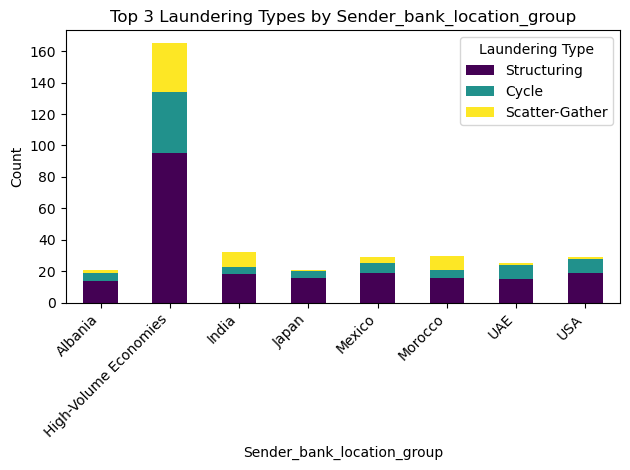

<Figure size 1000x600 with 0 Axes>

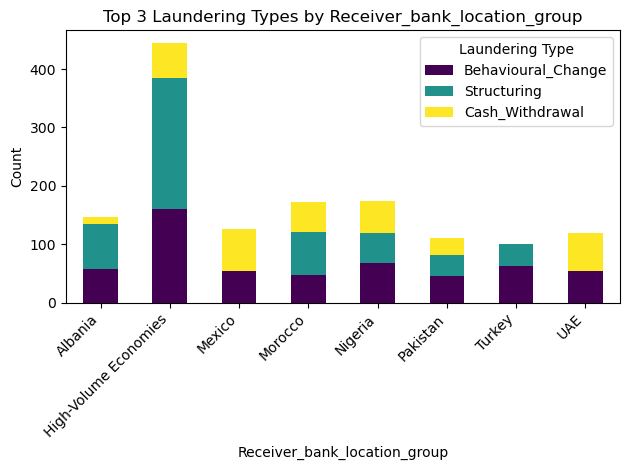

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
columns = [
    'Payment_currency', 'Received_currency', 'Sender_bank_location', 
    'Receiver_bank_location', 'Payment_type', 'currency_pair', 
    'country_pair', 'Sender_bank_location_group', 'Receiver_bank_location_group'
]

# Dictionary of columns and values to exclude
exclusions = {
    'Payment_currency': ['UK pounds'],
    'Received_currency': ['UK pounds'],
    'Sender_bank_location': ['UK'],
    'Receiver_bank_location': ['UK'],
    'currency_pair': ['UK pounds to UK pounds'],
    'country_pair': ['UK to UK'],
    'Sender_bank_location_group': ['UK'],
    'Receiver_bank_location_group': ['UK'],
    'Payment_type': []  # No exclusions for Payment_type
}

# Function to plot stacked bar for a given column
def plot_stacked_bar(df, column):
    # Apply exclusions for the specific column
    exclude_values = exclusions.get(column, [])
    if exclude_values:
        df_filtered = df[~df[column].isin(exclude_values)]
    else:
        df_filtered = df
    
    # Get the top 8 frequent categories for the column (if more than 8 unique values)
    if df_filtered[column].nunique() > 8:
        top_categories = df_filtered[column].value_counts().head(8).index
        df_filtered = df_filtered[df_filtered[column].isin(top_categories)]
    
    # Get the top 3 Laundering_type values (based on frequency in the filtered dataset)
    top_laundering_types = df_filtered['Laundering_type'].value_counts().head(3).index
    
    # Filter for top 3 Laundering_type
    df_filtered = df_filtered[df_filtered['Laundering_type'].isin(top_laundering_types)]
    
    # Create a pivot table for stacking
    pivot_df = df_filtered.pivot_table(
        index=column, 
        columns='Laundering_type', 
        aggfunc='size', 
        fill_value=0
    )
    
    # Ensure only top 3 Laundering_type are included in the plot
    pivot_df = pivot_df[top_laundering_types]
    
    # Skip plotting if the pivot table is empty
    if pivot_df.empty:
        print(f"No data to plot for {column} after filtering exclusions and selecting top categories")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    pivot_df.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Top 3 Laundering Types by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Laundering Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Filter the DataFrame for Is_laundering == 1 and iterate through each column
for col in columns:
    plot_stacked_bar(df[df["Is_laundering"] == 1], col)

<Figure size 800x600 with 0 Axes>

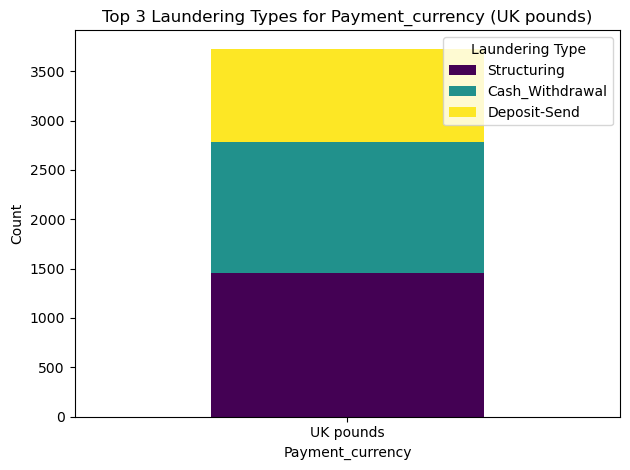

<Figure size 800x600 with 0 Axes>

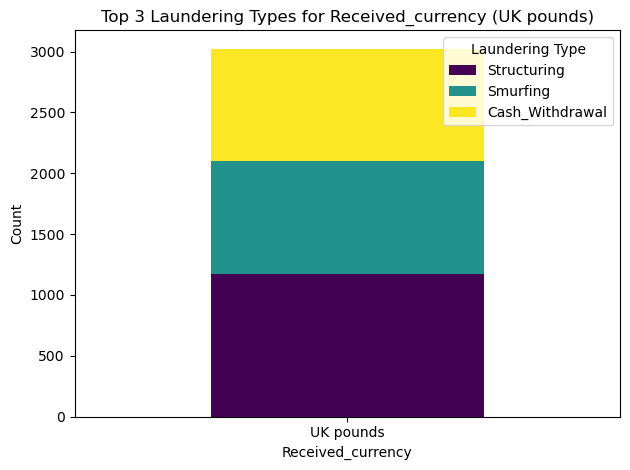

<Figure size 800x600 with 0 Axes>

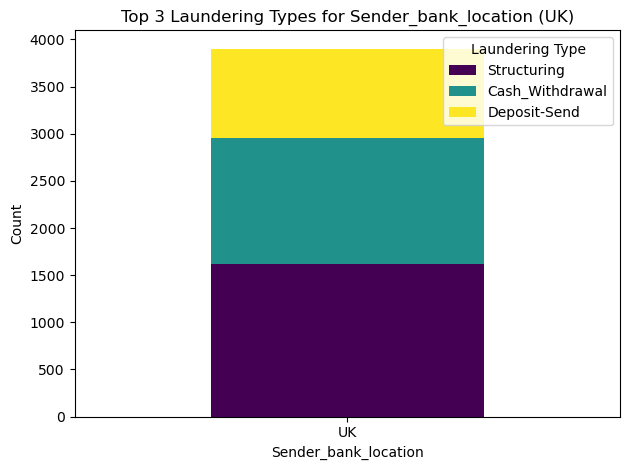

<Figure size 800x600 with 0 Axes>

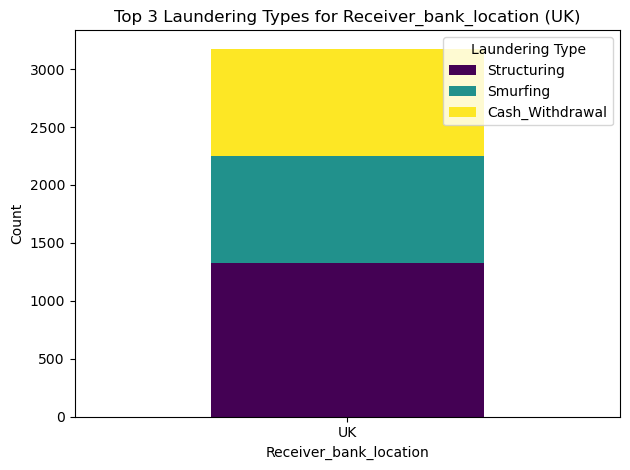

No UK-related values to plot for Payment_type


<Figure size 800x600 with 0 Axes>

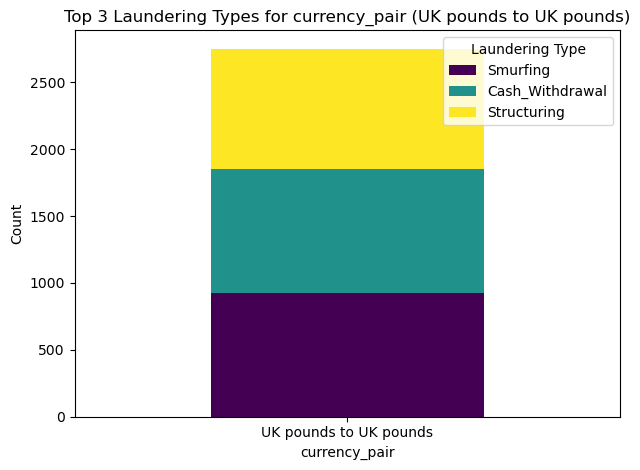

<Figure size 800x600 with 0 Axes>

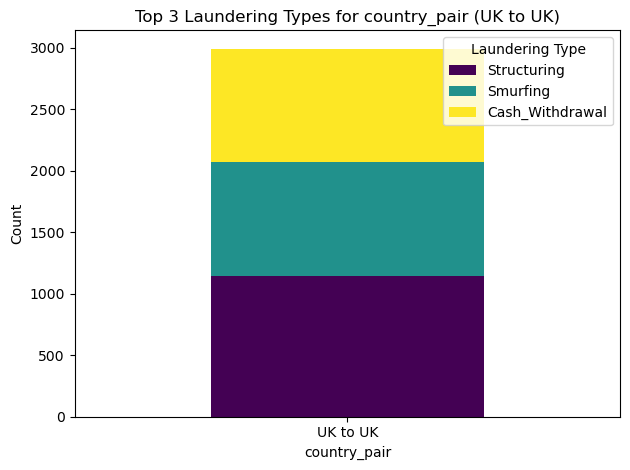

<Figure size 800x600 with 0 Axes>

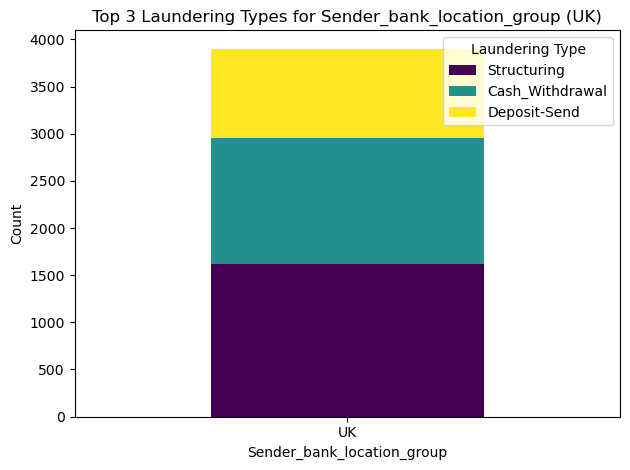

<Figure size 800x600 with 0 Axes>

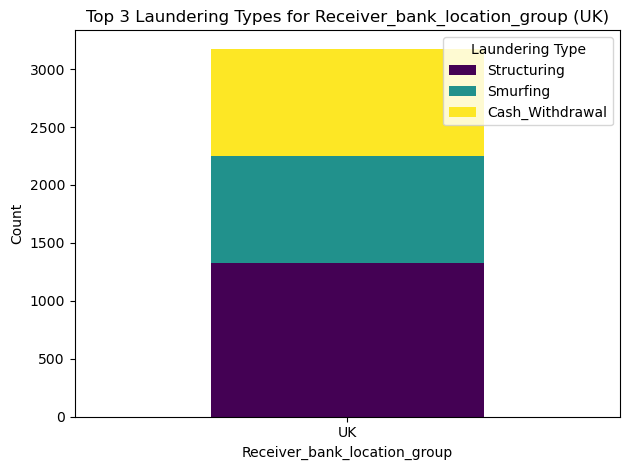

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
columns = [
    'Payment_currency', 'Received_currency', 'Sender_bank_location', 
    'Receiver_bank_location', 'Payment_type', 'currency_pair', 
    'country_pair', 'Sender_bank_location_group', 'Receiver_bank_location_group'
]

# Dictionary of columns and "UK"-related values to include
uk_values = {
    'Payment_currency': ['UK pounds'],
    'Received_currency': ['UK pounds'],
    'Sender_bank_location': ['UK'],
    'Receiver_bank_location': ['UK'],
    'currency_pair': ['UK pounds to UK pounds'],
    'country_pair': ['UK to UK'],
    'Sender_bank_location_group': ['UK'],
    'Receiver_bank_location_group': ['UK'],
    'Payment_type': []  # No UK-related values for Payment_type
}

# Function to plot stacked bar for a given column's UK-related value
def plot_stacked_bar_uk(df, column):
    # Get the UK-related value(s) to include for the column
    include_values = uk_values.get(column, [])
    
    # Skip if no UK-related values are specified for the column
    if not include_values:
        print(f"No UK-related values to plot for {column}")
        return
    
    # Filter for the specific UK-related value
    df_filtered = df[df[column].isin(include_values)]
    
    # Check if there's any data after filtering
    if df_filtered.empty:
        print(f"No data to plot for {column} with value(s) {include_values}")
        return
    
    # Get the top 3 Laundering_type values (based on frequency in the filtered dataset)
    top_laundering_types = df_filtered['Laundering_type'].value_counts().head(3).index
    
    # Filter for top 3 Laundering_type
    df_filtered = df_filtered[df_filtered['Laundering_type'].isin(top_laundering_types)]
    
    # Create a pivot table for stacking
    pivot_df = df_filtered.pivot_table(
        index=column, 
        columns='Laundering_type', 
        aggfunc='size', 
        fill_value=0
    )
    
    # Ensure only top 3 Laundering_type are included in the plot
    pivot_df = pivot_df[top_laundering_types]
    
    # Skip plotting if the pivot table is empty
    if pivot_df.empty:
        print(f"No data to plot for {column} after selecting top Laundering_type")
        return
    
    # Plotting
    plt.figure(figsize=(8, 6))
    pivot_df.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Top 3 Laundering Types for {column} ({include_values[0]})')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Laundering Type')
    plt.xticks(rotation=0)  # No rotation needed since only one bar
    plt.tight_layout()
    plt.show()

# Filter the DataFrame for Is_laundering == 1 and iterate through each column
for col in columns:
    plot_stacked_bar_uk(df[df["Is_laundering"] == 1], col)

<Figure size 1000x600 with 0 Axes>

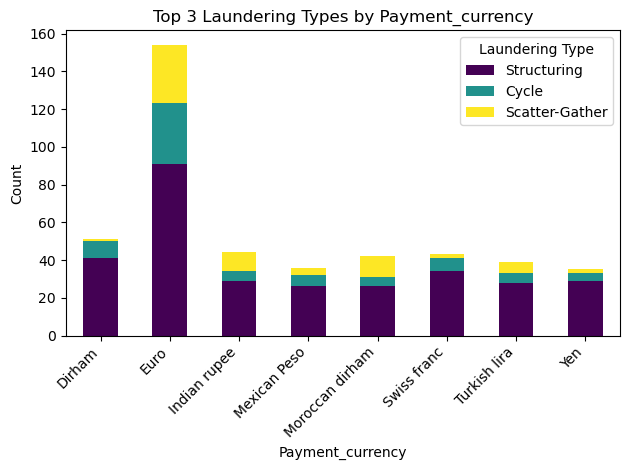

<Figure size 1000x600 with 0 Axes>

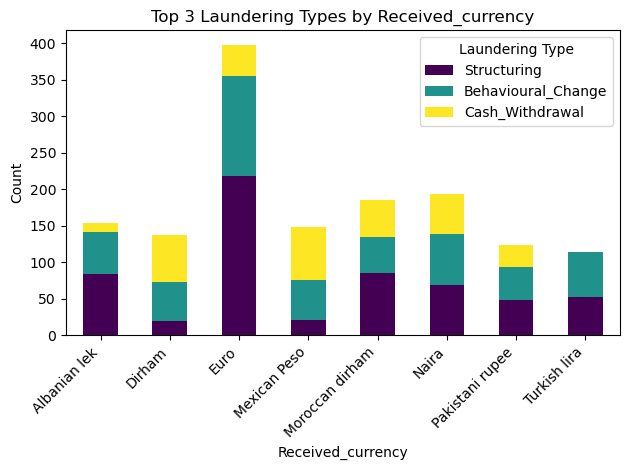

<Figure size 1000x600 with 0 Axes>

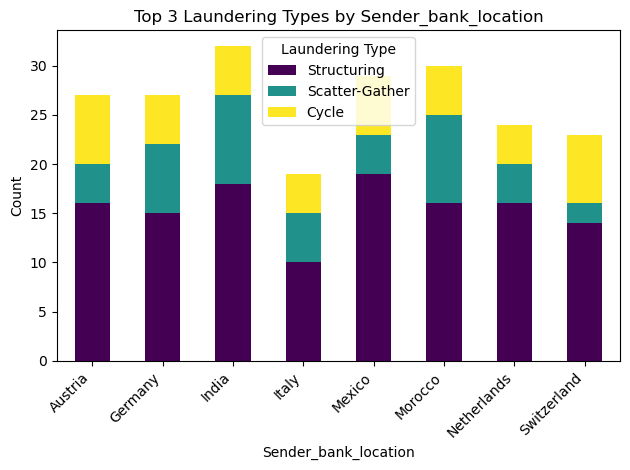

<Figure size 1000x600 with 0 Axes>

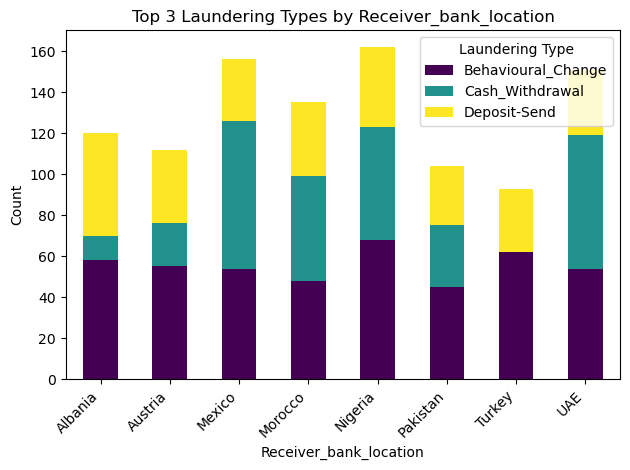

<Figure size 1000x600 with 0 Axes>

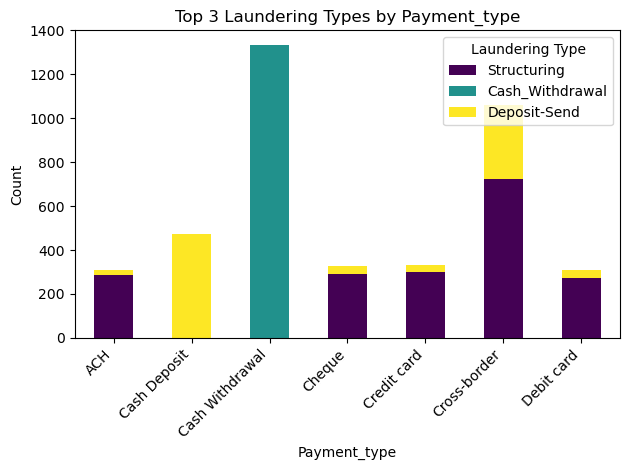

<Figure size 1000x600 with 0 Axes>

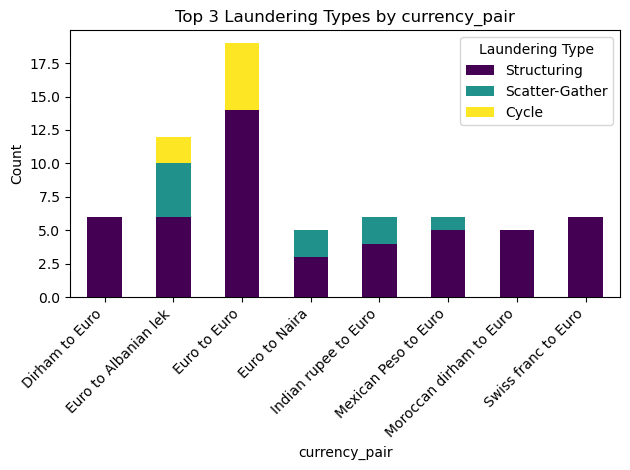

<Figure size 1000x600 with 0 Axes>

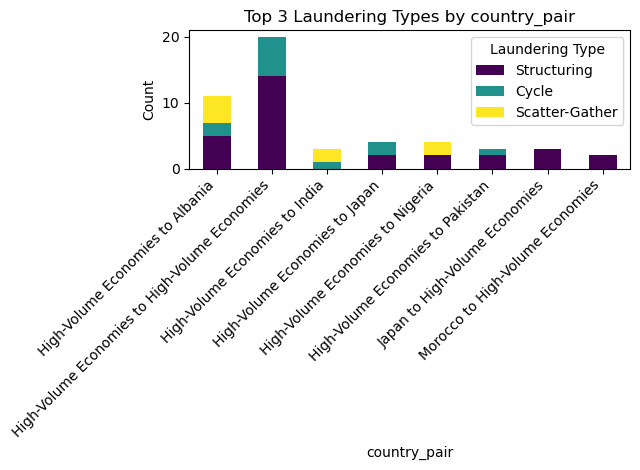

<Figure size 1000x600 with 0 Axes>

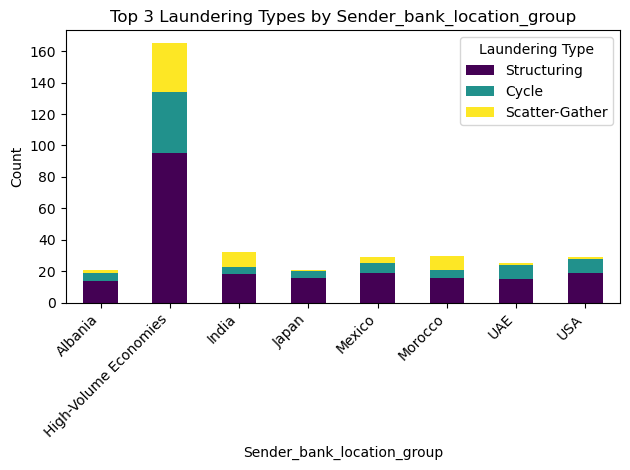

<Figure size 1000x600 with 0 Axes>

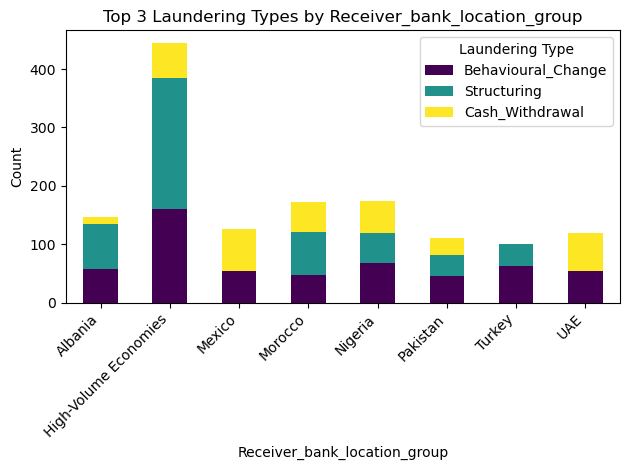

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
columns = [
    'Payment_currency', 'Received_currency', 'Sender_bank_location', 
    'Receiver_bank_location', 'Payment_type', 'currency_pair', 
    'country_pair', 'Sender_bank_location_group', 'Receiver_bank_location_group'
]

# Function to plot stacked bar for a given column
def plot_stacked_bar(df, column):
    # Filter out rows where the column value contains 'UK' (case-insensitive)
    df_filtered = df[~df[column].str.contains('UK', case=False, na=False)]
    
    # Get the top 8 frequent categories for the column (if more than 8 unique values)
    if df_filtered[column].nunique() > 8:
        top_categories = df_filtered[column].value_counts().head(8).index
        df_filtered = df_filtered[df_filtered[column].isin(top_categories)]
    
    # Get the top 3 Laundering_type values (based on frequency in the filtered dataset)
    top_laundering_types = df_filtered['Laundering_type'].value_counts().head(3).index
    
    # Filter for top 3 Laundering_type
    df_filtered = df_filtered[df_filtered['Laundering_type'].isin(top_laundering_types)]
    
    # Create a pivot table for stacking
    pivot_df = df_filtered.pivot_table(
        index=column, 
        columns='Laundering_type', 
        aggfunc='size', 
        fill_value=0
    )
    
    # Ensure only top 3 Laundering_type are included in the plot
    pivot_df = pivot_df[top_laundering_types]
    
    # Skip plotting if the pivot table is empty
    if pivot_df.empty:
        print(f"No data to plot for {column} after filtering out 'UK' and selecting top categories")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    pivot_df.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Top 3 Laundering Types by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Laundering Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Filter the DataFrame for Is_laundering == 1 and iterate through each column
for col in columns:
    plot_stacked_bar(df[df["Is_laundering"] == 1], col)

In [221]:
filtered_df = df[df["Is_laundering"] == 1]
filtered_df

Time        Date  Sender_account  Receiver_account   Amount  \
317      10:46:37  2022-10-07      7401327478        4336451277  2603.30   
1206     11:19:32  2022-10-07      6340007440        4316483340   106.04   
1649     11:35:42  2022-10-07      3758118046        6081504025  5903.33   
1954     11:45:53  2022-10-07       445154846        4497771501  3957.87   
3304     12:39:03  2022-10-07      2758469152        2987279234  7832.41   
...           ...         ...             ...               ...      ...   
9499725  07:56:34  2023-08-23      6347914836        8661825378  6702.17   
9501820  09:12:18  2023-08-23      9285879778           7750754   814.49   
9501946  09:16:07  2023-08-23       351184098        4257557167  7888.58   
9503705  10:18:07  2023-08-23      7929569569        8236488006 30061.13   
9504744  10:53:52  2023-08-23      2346864590        2116866170  1436.69   

        Payment_currency Received_currency Sender_bank_location  \
317            UK pounds         UK pounds                   UK   
1206           UK pounds      Indian rupee                   UK   
1649           UK pounds      Mexican Peso                   UK   
1954           UK pounds             Naira                   UK   
3304           UK pounds         UK pounds                   UK   
...                  ...               ...                  ...   
9499725        UK pounds         US dollar                   UK   
9501820        UK pounds              Euro                   UK   
9501946        UK pounds      Turkish lira                   UK   
9503705        UK pounds         UK pounds                   UK   
9504744        UK pounds              Euro                   UK   

        Receiver_bank_location     Payment_type Is_laundering  \
317                         UK     Cash Deposit             1   
1206                     India  Cash Withdrawal             1   
1649                    Mexico     Cross-border             1   
1954                   Nigeria     Cross-border             1   
3304                        UK       Debit card             1   
...                        ...              ...           ...   
9499725                    USA     Cross-border             1   
9501820                Austria     Cross-border             1   
9501946                 Turkey     Cross-border             1   
9503705                     UK      Credit card             1   
9504744                Austria     Cross-border             1   

            Laundering_type              currency_pair  \
317                Smurfing     UK pounds to UK pounds   
1206        Cash_Withdrawal  UK pounds to Indian rupee   
1649     Behavioural_Change  UK pounds to Mexican Peso   
1954            Structuring         UK pounds to Naira   
3304            Structuring     UK pounds to UK pounds   
...                     ...                        ...   
9499725      Layered_Fan_In     UK pounds to US dollar   
9501820  Behavioural_Change          UK pounds to Euro   
9501946  Behavioural_Change  UK pounds to Turkish lira   
9503705               Cycle     UK pounds to UK pounds   
9504744        Deposit-Send          UK pounds to Euro   

                        country_pair Sender_bank_location_group  \
317                         UK to UK                         UK   
1206                     UK to India                         UK   
1649                    UK to Mexico                         UK   
1954                   UK to Nigeria                         UK   
3304                        UK to UK                         UK   
...                              ...                        ...   
9499725                    UK to USA                         UK   
9501820  UK to High-Volume Economies                         UK   
9501946                 UK to Turkey                         UK   
9503705                     UK to UK                         UK   
9504744  UK to High-Volume Economies                         UK   

        Rece

In [234]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract month, day, and week

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Week'] = df['Date'].dt.isocalendar().week

<Axes: xlabel='Year', ylabel='count'>

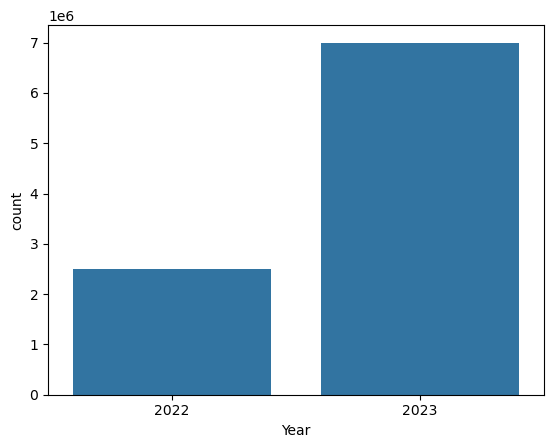

In [235]:
sns.countplot(data=df, x='Year')

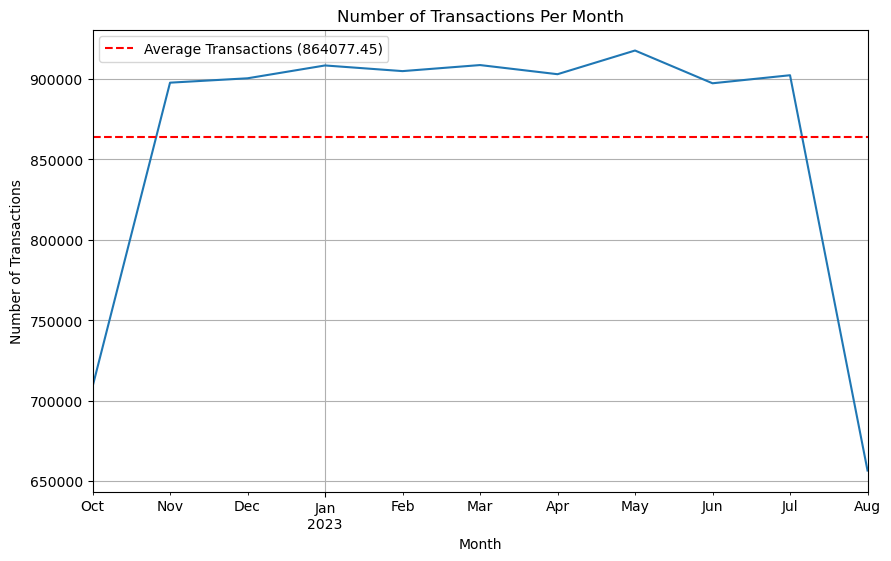

In [236]:
## Monthly Transactions

monthly_transactions = df.groupby(df['Date'].dt.to_period('M')).size()

average_monthly_transactions = monthly_transactions.mean()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line')
plt.axhline(y=average_monthly_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_monthly_transactions:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Per Month')
plt.legend()
plt.grid(True)
plt.show();

In [237]:
## Weekly Transactions

weekly_transactions = df.groupby(df['Date'].dt.to_period('W')).size()

average_weekly_transactions = weekly_transactions.mean()

plt.figure(figsize=(10, 6))
weekly_transactions.plot(kind='line')
plt.axhline(y=average_weekly_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_weekly_transactions:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Per Week')
plt.legend()
plt.grid(True)
plt.show();

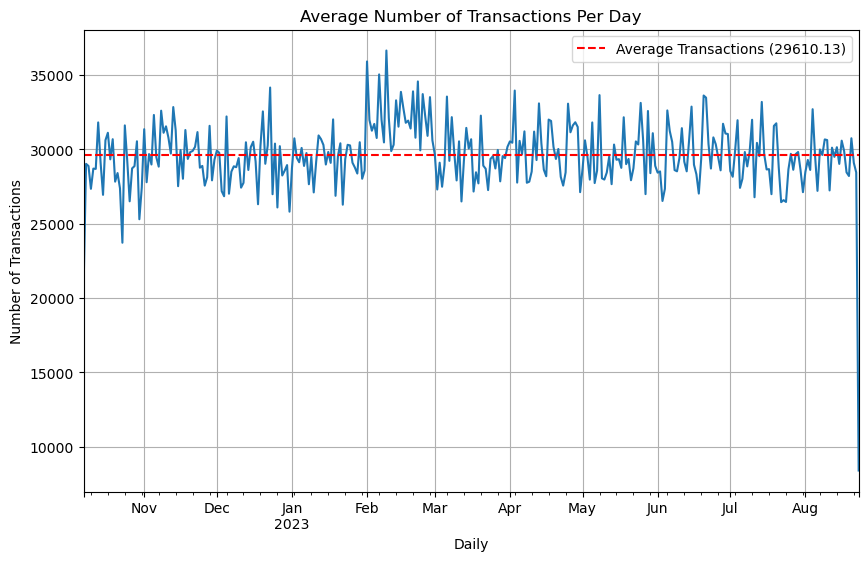

In [238]:
## Daily Transactions

daily_transactions = df.groupby(df['Date'].dt.to_period('D')).size()

average_daily_transactions = daily_transactions.mean()


plt.figure(figsize=(10, 6))
daily_transactions.plot(kind='line')
plt.axhline(y=average_daily_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_daily_transactions:.2f})')
plt.xlabel('Daily')
plt.ylabel('Number of Transactions')
plt.title('Average Number of Transactions Per Day')
plt.legend()
plt.grid(True)
plt.show();

In [254]:
df_Normal = df.copy()
df_Normal.loc[df_Normal["Is_laundering"] == 0, "Laundering_type"] = "Normal"
df_Normal[df_Normal["Is_laundering"] == 0]["Laundering_type"].value_counts()

Laundering_type
Normal    9494979
Name: count, dtype: int64

In [283]:
df["Is_laundering"].value_counts()

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64

In [285]:
import pandas as pd

# Assume df is your DataFrame with 9M rows
# Example: df = pd.read_csv('your_data.csv')

# Define the target column
target_column = 'Is_laundering'

# Step 1: Split the DataFrame by Is_laundering value
df_zero = df[df[target_column] == 0]  # Rows where Is_laundering == 0
df_one = df[df[target_column] == 1]   # Rows where Is_laundering == 1

# Verify the number of rows in each subset
print(f"Rows with Is_laundering == 0: {len(df_zero)}")
print(f"Rows with Is_laundering == 1: {len(df_one)}")

# Step 2: Sample exactly 2,000,000 rows from Is_laundering == 0
sample_size_zero = 2_000_000
if len(df_zero) < sample_size_zero:
    raise ValueError(f"Not enough rows with Is_laundering == 0. Available: {len(df_zero)}, Required: {sample_size_zero}")

df_zero_sample = df_zero.sample(n=sample_size_zero, random_state=42)

# Step 3: Combine sampled Is_laundering == 0 with all Is_laundering == 1
df_new = pd.concat([df_zero_sample, df_one], ignore_index=True)

# Shuffle the new DataFrame to mix the rows
df_new = df_new.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Verify the new DataFrame
print(f"\nNew DataFrame size: {len(df_new)} rows")
print("Expected size: 2,009,000 rows")
print("\nClass distribution in original DataFrame:")
print(df[target_column].value_counts())
print("\nClass distribution in new DataFrame:")
print(df_new[target_column].value_counts())
print(df_new[target_column].value_counts())

print("\nSaved new DataFrame to 'sampled_2009000_data.csv'")

Rows with Is_laundering == 0: 9494979
Rows with Is_laundering == 1: 9873

New DataFrame size: 2009873 rows
Expected size: 2,009,000 rows

Class distribution in original DataFrame:
Is_laundering
0    9494979
1       9873
Name: count, dtype: int64

Class distribution in new DataFrame:
Is_laundering
0    2000000
1       9873
Name: count, dtype: int64
Is_laundering
0    2000000
1       9873
Name: count, dtype: int64

Saved new DataFrame to 'sampled_2009000_data.csv'


In [287]:
numeric_cols = df.select_dtypes(exclude="object").columns
categorical_cols = df.select_dtypes(include="object").columns
X = df_new.drop(columns=["Is_laundering", "Laundering_type","Date","Time","Sender_bank_location","Receiver_bank_location"],axis=1)
y = df_new["Is_laundering"]
numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features),
    ("RobustScaler", RobustScaler(), numerical_features)
], remainder="passthrough")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder(),
        "scaler", StandardScaler())
    ]
)
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1607898, 14), (401975, 14), (1607898,), (401975,))

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define models and their parameter grids
models = {
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', random_state=42),
        'param_grid': {
            'max_depth': [16],
            'eta': [0.1],
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'max_depth': [12],
            'n_estimators': [400],
            'min_samples_split': [4]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42, verbose=-1),
        'param_grid': {
            'max_depth': [16],
            'learning_rate': [0.05],
            'n_estimators': [450]
        }
    }
}

# Dictionary to store results
results = {}

# Perform GridSearchCV for each model
for model_name, config in models.items():
    print(f"\nTuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['param_grid'],
        scoring='roc_auc',
        cv=1,
        verbose=2
    )
    
    grid_search.fit(X_train, y_train)
    
    # Store best parameters and model
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_model': grid_search.best_estimator_
    }
    
    # Evaluate on test set
    y_pred = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_pred)
    results[model_name]['test_auc'] = test_auc
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Test AUC for {model_name}: {test_auc:.4f}")

# Summary of results
print("\nSummary of Model Performance:")
for model_name, result in results.items():
    print(f"{model_name}: Test AUC = {result['test_auc']:.4f}, Best Params = {result['best_params']}")


Tuning XGBoost...
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ..............................eta=0.1, max_depth=16; total time=   9.9s
[CV] END ..............................eta=0.1, max_depth=16; total time=   8.5s
Best Parameters for XGBoost: {'eta': 0.1, 'max_depth': 16}
Test AUC for XGBoost: 0.8750

Tuning RandomForest...
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END max_depth=12, min_samples_split=4, n_estimators=400; total time=14.5min
[CV] END max_depth=12, min_samples_split=4, n_estimators=400; total time=14.6min
Best Parameters for RandomForest: {'max_depth': 12, 'min_samples_split': 4, 'n_estimators': 400}
Test AUC for RandomForest: 0.8294

Tuning LightGBM...
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ..learning_rate=0.1, max_depth=16, n_estimators=450; total time=   8.7s
[CV] END ..learning_rate=0.1, max_depth=16, n_estimators=450; total time=   8.7s
[CV] END .learning_rate=0.05, max_depth=16, n_estimator

In [290]:
xgboost_model = results['XGBoost']['best_model']
rf_model = results['RandomForest']['best_model']
lgbm_model = results['LightGBM']['best_model']

In [291]:
# Predict probabilities for the positive class
xgboost_probs = results['XGBoost']['best_model'].predict_proba(X_test)[:, 1]
rf_probs = results['RandomForest']['best_model'].predict_proba(X_test)[:, 1]
lgbm_probs = results['LightGBM']['best_model'].predict_proba(X_test)[:, 1]

In [296]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

test_probabilities = results['LightGBM']['best_model'].predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, test_probabilities)
print("Test Set AUC: ", test_auc)

fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show();

Test Set AUC:  0.8621144101265823


In [297]:

from sklearn.metrics import confusion_matrix

desired_tpr = 0.87
closest_threshold = thresholds[np.argmin(np.abs(tpr - desired_tpr))]
print(f"Desired TPR of around 90%:")

y_pred = (test_probabilities >= closest_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix at {desired_tpr*100}% TPR')
plt.show()

tn, fp, fn, tp = cm.ravel()
fpr_cm = fp / (fp + tn)
tpr_cm = tp / (tp + fn)

print(f"False Positive Rate (FPR): {fpr_cm:.3f}")
print(f"True Positive Rate (TPR): {tpr_cm:.3f}")

Desired TPR of around 90%:


False Positive Rate (FPR): 0.397
True Positive Rate (TPR): 0.870
